# Import the libraries:

In [5]:
#Load the required packages
import numpy as np 
import pandas as pd 
#Plot styling
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import scipy.cluster.hierarchy as sch 
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# Import stats from scipy
from scipy import stats

### DATA MINING :
    
    Data mining is a process to analyze massive volumes of data to discover business intelligence that helps to solve 
    problems, mitigate risks, and seize new opportunities.Data Mining is based on mathematical algorithms and analytical 
    skills to drive the desired results from the huge database collection.It helps the professionals develop 
    competitive  business strategies and manage operations effectively, including marketing, finance, customer support,
    HR, and other areas. It assists in risk management, fraud detection and cyber security planning, among other 
    significant advantages. 

# Problem 1: Clustering

### A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.



### Data Dictionary for Market Segmentation:
- spending: Amount spent by the customer per month (in 1000s)
- advance_payments: Amount paid by the customer in advance by cash (in 100s)
- probability_of_full_payment: Probability of payment done in full by the customer to the bank
- current_balance: Balance amount left in the account to make purchases (in 1000s)
- credit_limit: Limit of the amount in credit card (10000s)
- min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
- max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

# 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

### Load the data:

In [6]:
bank_df=pd.read_csv("bank_marketing_part1_Data.csv")

### Checking the data:

In [7]:
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [8]:
bank_df.tail()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


#### Checking the shape of the data :

In [9]:
### data dimensions
print("no. of rows: ",bank_df.shape[0], "\n""no. of columns: ",bank_df.shape[1])

no. of rows:  210 
no. of columns:  7


### Retreive the list of fields along with their data type:

In [10]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


### Observation:

- The Dataset consists 210 rows and 7 different attributes of credit card data.
- No missing record based on intial analysis.
- All the variables are numeric type.

### Checking the Summary Statistic

In [11]:
bank_df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [12]:
bank_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


### Observation:

- Based on summary descriptive, the data looks good.
- We can observe that the average spending of the customer per month is 14.84 with minimum spending of 10.59 and maximum spending of 21.18.
- We see for most of the variable, mean/medium are nearly equal
- Include a 90% to see variations and it looks distributely evenly
- Standard Deviation is high for spending variable.
- There are considerable number of variables that are highly correlated.

In [13]:
### Checking for Missing Values

bank_df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

### Observation:
- No missing value.

### Checking for duplicate values:

In [14]:
bank_df.duplicated().sum()

0

In [15]:
dups = bank_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


## Data Visualization:

### Univariate analysis

#### Spending variable :

In [19]:
bank_df.spending.describe()

count    210.000000
mean      14.847524
std        2.909699
min       10.590000
25%       12.270000
50%       14.355000
75%       17.305000
max       21.180000
Name: spending, dtype: float64

In [18]:
#Central values 
print('Minimum spending: ', bank_df['spending'].min())
print('Maximum spending: ',bank_df['spending'].max())
print('Mean value: ', bank_df['spending'].mean())
print('Median value: ',bank_df['spending'].median())
print('Standard deviation: ', bank_df['spending'].std())
print('Null values: ',bank_df['spending'].isnull().any())

Minimum spending:  10.59
Maximum spending:  21.18
Mean value:  14.847523809523818
Median value:  14.355
Standard deviation:  2.909699430687361
Null values:  False


In [20]:
from scipy import stats

In [21]:
#Quartiles

Q1=bank_df['spending'].quantile(q=0.25)
Q3=bank_df['spending'].quantile(q=0.75)
print('spending - 1st Quartile (Q1) is: ', Q1)
print('spending - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of spending is ', stats.iqr(bank_df['spending']))

spending - 1st Quartile (Q1) is:  12.27
spending - 3st Quartile (Q3) is:  17.305
Interquartile range (IQR) of spending is  5.035


In [22]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in spending: ', L_outliers)
print('Upper outliers in spending: ', U_outliers)

Lower outliers in spending:  4.717499999999999
Upper outliers in spending:  24.8575


In [23]:
print('Number of outliers in spending upper : ', bank_df[bank_df['spending']>24.8575]['spending'].count())
print('Number of outliers in spending lower : ', bank_df[bank_df['spending']<4.717499]['spending'].count())
print('% of Outlier in spending upper: ',round(bank_df[bank_df['spending']>24.8575]['spending'].count()*100/len(bank_df)), '%')
print('% of Outlier in spending lower: ',round(bank_df[bank_df['spending']<4.717499]['spending'].count()*100/len(bank_df)), '%')

Number of outliers in spending upper :  0
Number of outliers in spending lower :  0
% of Outlier in spending upper:  0 %
% of Outlier in spending lower:  0 %


<AxesSubplot:xlabel='spending'>

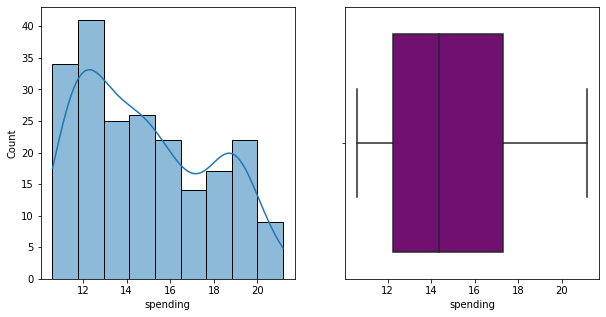

In [24]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(bank_df.spending, kde=True, ax=axs[0])
sns.boxplot(x='spending',data=bank_df, ax=axs[1], color='purple')

Observations :
- For Univariate Analysis of Spending we are using histplot and boxplot to find information or patterns in the data.
- The Boxplot of Spending variable seems to have no outliers. The distribution of the data is right skewed.

#### advance_payments variable

In [25]:
bank_df.advance_payments.describe()

count    210.000000
mean      14.559286
std        1.305959
min       12.410000
25%       13.450000
50%       14.320000
75%       15.715000
max       17.250000
Name: advance_payments, dtype: float64

In [26]:
#Central values 
print('Minimum advance_payments: ', bank_df['advance_payments'].min())
print('Maximum advance_payments: ',bank_df['advance_payments'].max())
print('Mean value: ', bank_df['advance_payments'].mean())
print('Median value: ',bank_df['advance_payments'].median())
print('Standard deviation: ', bank_df['advance_payments'].std())
print('Null values: ',bank_df['advance_payments'].isnull().any())

Minimum advance_payments:  12.41
Maximum advance_payments:  17.25
Mean value:  14.559285714285727
Median value:  14.32
Standard deviation:  1.305958726564022
Null values:  False


In [27]:
#Quartiles

Q1=bank_df['advance_payments'].quantile(q=0.25)
Q3=bank_df['advance_payments'].quantile(q=0.75)
print('advance_payments - 1st Quartile (Q1) is: ', Q1)
print('advance_payments - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of advance_payments is ', stats.iqr(bank_df['advance_payments']))

advance_payments - 1st Quartile (Q1) is:  13.45
advance_payments - 3st Quartile (Q3) is:  15.715
Interquartile range (IQR) of advance_payments is  2.2650000000000006


In [28]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in advance_payments: ', L_outliers)
print('Upper outliers in advance_payments: ', U_outliers)

Lower outliers in advance_payments:  10.052499999999998
Upper outliers in advance_payments:  19.1125


In [29]:
print('Number of outliers in advance_payments upper : ', bank_df[bank_df['advance_payments']>19.1125]['advance_payments'].count())
print('Number of outliers in advance_payments lower : ', bank_df[bank_df['advance_payments']<10.052499]['advance_payments'].count())
print('% of Outlier in advance_payments upper: ', round(bank_df[bank_df['advance_payments']>19.1125]['advance_payments'].count()*100/len(bank_df)), '%')
print('% of Outlier in advance_payments lower: ', round(bank_df[bank_df['advance_payments']<10.052499]['advance_payments'].count()*100/len(bank_df)), '%')

Number of outliers in advance_payments upper :  0
Number of outliers in advance_payments lower :  0
% of Outlier in advance_payments upper:  0 %
% of Outlier in advance_payments lower:  0 %


<AxesSubplot:xlabel='advance_payments'>

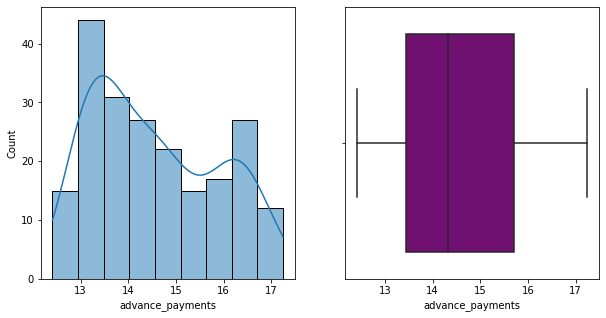

In [30]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(bank_df.advance_payments, kde=True, ax=axs[0])
sns.boxplot(x='advance_payments',data=bank_df, ax=axs[1], color='purple')

Observations :

- The boxplot of advance_payments variable has no outliers.
- The distribution of the data is right skewed.

#### probability_of_full_payment variable

In [31]:
bank_df.probability_of_full_payment.describe()

count    210.000000
mean       0.870999
std        0.023629
min        0.808100
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: probability_of_full_payment, dtype: float64

In [32]:
#Central values 
print('Minimum probability_of_full_payment ', bank_df['probability_of_full_payment'].min())
print('Maximum probability_of_full_payment: ',bank_df['probability_of_full_payment'].max())
print('Mean value: ', bank_df['probability_of_full_payment'].mean())
print('Median value: ',bank_df['probability_of_full_payment'].median())
print('Standard deviation: ', bank_df['probability_of_full_payment'].std())
print('Null values: ',bank_df['probability_of_full_payment'].isnull().any())

Minimum probability_of_full_payment  0.8081
Maximum probability_of_full_payment:  0.9183
Mean value:  0.8709985714285714
Median value:  0.8734500000000001
Standard deviation:  0.0236294165838465
Null values:  False


In [33]:
#Quartiles

Q1=bank_df['probability_of_full_payment'].quantile(q=0.25)
Q3=bank_df['probability_of_full_payment'].quantile(q=0.75)
print('probability_of_full_payment - 1st Quartile (Q1) is: ', Q1)
print('probability_of_full_payment - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of probability_of_full_payment is ', stats.iqr(bank_df['probability_of_full_payment']))

probability_of_full_payment - 1st Quartile (Q1) is:  0.8569
probability_of_full_payment - 3st Quartile (Q3) is:  0.887775
Interquartile range (IQR) of probability_of_full_payment is  0.030874999999999986


In [34]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in probability_of_full_payment: ', L_outliers)
print('Upper outliers in probability_of_full_payment: ', U_outliers)

Lower outliers in probability_of_full_payment:  0.8105875
Upper outliers in probability_of_full_payment:  0.9340875


In [35]:
print('Number of outliers in probability_of_full_payment upper : ', bank_df[bank_df['probability_of_full_payment']>0.9340875]['probability_of_full_payment'].count())
print('Number of outliers in probability_of_full_payment lower : ', bank_df[bank_df['probability_of_full_payment']<0.8105875]['probability_of_full_payment'].count())
print('% of Outlier in probability_of_full_payment upper: ',round(bank_df[bank_df['probability_of_full_payment']>0.9340875]['probability_of_full_payment'].count()*100/len(bank_df)), '%')
print('% of Outlier in probability_of_full_payment lower: ',round(bank_df[bank_df['probability_of_full_payment']<0.8105875]['probability_of_full_payment'].count()*100/len(bank_df)), '%')

Number of outliers in probability_of_full_payment upper :  0
Number of outliers in probability_of_full_payment lower :  3
% of Outlier in probability_of_full_payment upper:  0 %
% of Outlier in probability_of_full_payment lower:  1 %


<AxesSubplot:xlabel='probability_of_full_payment'>

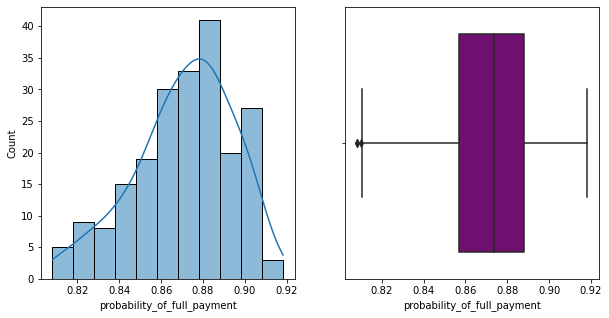

In [36]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(bank_df.probability_of_full_payment, kde=True, ax=axs[0])
sns.boxplot(x='probability_of_full_payment',data=bank_df, ax=axs[1], color='purple')

Observations :
  
- The Boxplot of probability_of_full_payment variable has no outliers.
- The distribution of the data is left skewed.

#### current_balance variable :

In [37]:
bank_df.current_balance.describe()

count    210.000000
mean       5.628533
std        0.443063
min        4.899000
25%        5.262250
50%        5.523500
75%        5.979750
max        6.675000
Name: current_balance, dtype: float64

In [38]:
#Central values 
print('Minimum current_balance: ', bank_df['current_balance'].min())
print('Maximum current_balance: ',bank_df['current_balance'].max())
print('Mean value: ', bank_df['current_balance'].mean())
print('Median value: ',bank_df['current_balance'].median())
print('Standard deviation: ', bank_df['current_balance'].std())
print('Null values: ',bank_df['current_balance'].isnull().any())

Minimum current_balance:  4.899
Maximum current_balance:  6.675
Mean value:  5.628533333333335
Median value:  5.5235
Standard deviation:  0.44306347772644944
Null values:  False


In [39]:
#Quartiles

Q1=bank_df['current_balance'].quantile(q=0.25)
Q3=bank_df['current_balance'].quantile(q=0.75)
print('current_balance - 1st Quartile (Q1) is: ', Q1)
print('current_balance - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of current_balance is ', stats.iqr(bank_df['current_balance']))

current_balance - 1st Quartile (Q1) is:  5.26225
current_balance - 3st Quartile (Q3) is:  5.97975
Interquartile range (IQR) of current_balance is  0.7175000000000002


In [40]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in current_balance: ', L_outliers)
print('Upper outliers in current_balance: ', U_outliers)

Lower outliers in current_balance:  4.186
Upper outliers in current_balance:  7.056000000000001


In [41]:
print('Number of outliers in current_balance upper : ', bank_df[bank_df['current_balance']>7.056000000000001]['current_balance'].count())
print('Number of outliers in current_balance lower : ', bank_df[bank_df['current_balance']<4.186]['current_balance'].count())
print('% of Outlier in current_balance upper: ',round(bank_df[bank_df['current_balance']>7.056000000000001]['current_balance'].count()*100/len(bank_df)), '%')
print('% of Outlier in current_balance lower: ',round(bank_df[bank_df['current_balance']<4.186]['current_balance'].count()*100/len(bank_df)), '%')

Number of outliers in current_balance upper :  0
Number of outliers in current_balance lower :  0
% of Outlier in current_balance upper:  0 %
% of Outlier in current_balance lower:  0 %


<AxesSubplot:xlabel='current_balance'>

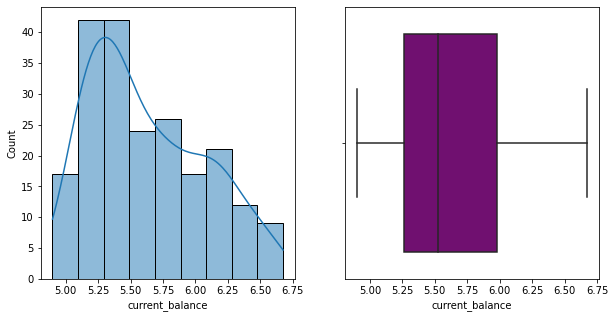

In [42]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(bank_df.current_balance, kde=True, ax=axs[0])
sns.boxplot(x='current_balance',data=bank_df, ax=axs[1], color='purple')

### Observations:
- The boxplot of Current_balance variable has no outliers.
- The distribution of the data is right skewed.

#### credit_limit variable :

In [43]:
bank_df.credit_limit.describe()

count    210.000000
mean       3.258605
std        0.377714
min        2.630000
25%        2.944000
50%        3.237000
75%        3.561750
max        4.033000
Name: credit_limit, dtype: float64

In [44]:
#Central values 
print('Minimum credit_limit: ', bank_df['credit_limit'].min())
print('Maximum credit_limit: ',bank_df['credit_limit'].max())
print('Mean value: ', bank_df['credit_limit'].mean())
print('Median value: ',bank_df['credit_limit'].median())
print('Standard deviation: ', bank_df['credit_limit'].std())
print('Null values: ',bank_df['credit_limit'].isnull().any())

Minimum credit_limit:  2.63
Maximum credit_limit:  4.033
Mean value:  3.258604761904763
Median value:  3.237
Standard deviation:  0.37771444490658734
Null values:  False


In [45]:
#Quartiles

Q1=bank_df['credit_limit'].quantile(q=0.25)
Q3=bank_df['credit_limit'].quantile(q=0.75)
print('credit_limit - 1st Quartile (Q1) is: ', Q1)
print('credit_limit - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of credit_limit is ', stats.iqr(bank_df['credit_limit']))

credit_limit - 1st Quartile (Q1) is:  2.944
credit_limit - 3st Quartile (Q3) is:  3.56175
Interquartile range (IQR) of credit_limit is  0.61775


In [46]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in credit_limit: ', L_outliers)
print('Upper outliers in credit_limit: ', U_outliers)

Lower outliers in credit_limit:  2.017375
Upper outliers in credit_limit:  4.488375


In [47]:
print('Number of outliers in credit_limit upper : ', bank_df[bank_df['credit_limit']>4.488375]['credit_limit'].count())
print('Number of outliers in credit_limit lower : ', bank_df[bank_df['credit_limit']<2.017375]['credit_limit'].count())
print('% of Outlier in credit_limit upper: ',round(bank_df[bank_df['credit_limit']>4.488375]['credit_limit'].count()*100/len(bank_df)), '%')
print('% of Outlier in credit_limit lower: ',round(bank_df[bank_df['credit_limit']<2.017375]['credit_limit'].count()*100/len(bank_df)), '%')

Number of outliers in credit_limit upper :  0
Number of outliers in credit_limit lower :  0
% of Outlier in credit_limit upper:  0 %
% of Outlier in credit_limit lower:  0 %


<AxesSubplot:xlabel='credit_limit'>

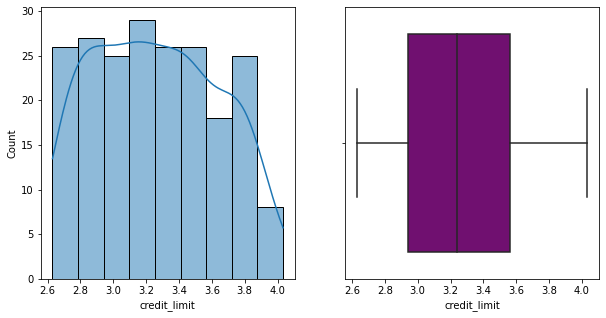

In [48]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(bank_df.credit_limit, kde=True, ax=axs[0])
sns.boxplot(x='credit_limit',data=bank_df, ax=axs[1], color='purple')

### Observations:

- The boxplot of credit_limit variables has no outliers.
- The distribution of the data is spreaded normally.

#### min_payment_amt variable :

In [49]:
bank_df.min_payment_amt.describe()

count    210.000000
mean       3.700201
std        1.503557
min        0.765100
25%        2.561500
50%        3.599000
75%        4.768750
max        8.456000
Name: min_payment_amt, dtype: float64

In [50]:
#Central values 
print('Minimum min_payment_amt: ', bank_df['min_payment_amt'].min())
print('Maximum min_payment_amt: ',bank_df['min_payment_amt'].max())
print('Mean value: ', bank_df['min_payment_amt'].mean())
print('Median value: ',bank_df['min_payment_amt'].median())
print('Standard deviation: ', bank_df['min_payment_amt'].std())
print('Null values: ',bank_df['min_payment_amt'].isnull().any())

Minimum min_payment_amt:  0.7651
Maximum min_payment_amt:  8.456
Mean value:  3.7002009523809503
Median value:  3.599
Standard deviation:  1.5035571308217792
Null values:  False


In [51]:
#Quartiles

Q1=bank_df['min_payment_amt'].quantile(q=0.25)
Q3=bank_df['min_payment_amt'].quantile(q=0.75)
print('min_payment_amt - 1st Quartile (Q1) is: ', Q1)
print('min_payment_amt - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of min_payment_amt is ', stats.iqr(bank_df['min_payment_amt']))

min_payment_amt - 1st Quartile (Q1) is:  2.5615
min_payment_amt - 3st Quartile (Q3) is:  4.76875
Interquartile range (IQR) of min_payment_amt is  2.2072499999999997


In [52]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in min_payment_amt: ', L_outliers)
print('Upper outliers in min_payment_amt: ', U_outliers)

Lower outliers in min_payment_amt:  -0.7493749999999992
Upper outliers in min_payment_amt:  8.079625


In [53]:
print('Number of outliers in min_payment_amt upper : ', bank_df[bank_df['min_payment_amt']>8.079625]['min_payment_amt'].count())
print('Number of outliers in min_payment_amt lower : ', bank_df[bank_df['min_payment_amt']<-0.749375]['min_payment_amt'].count())
print('% of Outlier in min_payment_amt upper: ',round(bank_df[bank_df['min_payment_amt']>8.079625]['min_payment_amt'].count()*100/len(bank_df)), '%')
print('% of Outlier in min_payment_amt lower: ',round(bank_df[bank_df['min_payment_amt']<-0.749375]['min_payment_amt'].count()*100/len(bank_df)), '%')

Number of outliers in min_payment_amt upper :  2
Number of outliers in min_payment_amt lower :  0
% of Outlier in min_payment_amt upper:  1 %
% of Outlier in min_payment_amt lower:  0 %


<AxesSubplot:xlabel='min_payment_amt'>

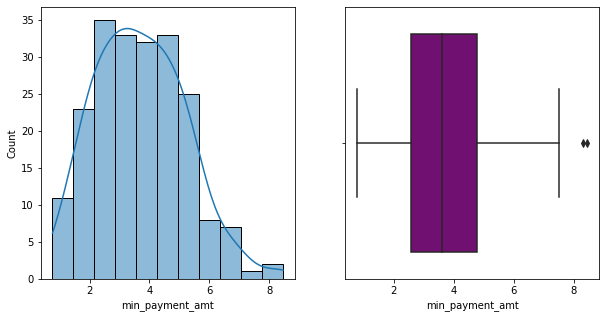

In [54]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(bank_df.min_payment_amt, kde=True, ax=axs[0])
sns.boxplot(x='min_payment_amt',data=bank_df, ax=axs[1], color='purple')

### Observations:

- From the above descriptive statistics and plots, we see that the min_payment_amt field is right skewed and has outliers.
- The distribution of the data is symmetric.

#### max_spent_in_single_shopping variable:

In [55]:
bank_df.max_spent_in_single_shopping.describe()

count    210.000000
mean       5.408071
std        0.491480
min        4.519000
25%        5.045000
50%        5.223000
75%        5.877000
max        6.550000
Name: max_spent_in_single_shopping, dtype: float64

In [56]:
#Central values 
print('Minimum max_spent_in_single_shopping: ', bank_df['max_spent_in_single_shopping'].min())
print('Maximum max_spent_in_single_shoppings: ',bank_df['max_spent_in_single_shopping'].max())
print('Mean value: ', bank_df['max_spent_in_single_shopping'].mean())
print('Median value: ',bank_df['max_spent_in_single_shopping'].median())
print('Standard deviation: ', bank_df['max_spent_in_single_shopping'].std())
print('Null values: ',bank_df['max_spent_in_single_shopping'].isnull().any())

Minimum max_spent_in_single_shopping:  4.519
Maximum max_spent_in_single_shoppings:  6.55
Mean value:  5.408071428571429
Median value:  5.223000000000001
Standard deviation:  0.49148049910240543
Null values:  False


In [57]:
#Quartiles

Q1=bank_df['max_spent_in_single_shopping'].quantile(q=0.25)
Q3=bank_df['max_spent_in_single_shopping'].quantile(q=0.75)
print('max_spent_in_single_shopping - 1st Quartile (Q1) is: ', Q1)
print('max_spent_in_single_shopping - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of max_spent_in_single_shopping is ', stats.iqr(bank_df['max_spent_in_single_shopping']))

max_spent_in_single_shopping - 1st Quartile (Q1) is:  5.045
max_spent_in_single_shopping - 3st Quartile (Q3) is:  5.877
Interquartile range (IQR) of max_spent_in_single_shopping is  0.8319999999999999


In [58]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in max_spent_in_single_shopping: ', L_outliers)
print('Upper outliers in max_spent_in_single_shopping: ', U_outliers)

Lower outliers in max_spent_in_single_shopping:  3.797
Upper outliers in max_spent_in_single_shopping:  7.125


In [59]:
print('Number of outliers in max_spent_in_single_shopping upper : ', bank_df[bank_df['max_spent_in_single_shopping']>7.125000000000002]['max_spent_in_single_shopping'].count())
print('Number of outliers in max_spent_in_single_shopping lower : ', bank_df[bank_df['max_spent_in_single_shopping']<3.796999999999999]['max_spent_in_single_shopping'].count())
print('% of Outlier in max_spent_in_single_shopping upper: ',round(bank_df[bank_df['max_spent_in_single_shopping']>7.125000000000002]['max_spent_in_single_shopping'].count()*100/len(bank_df)), '%')
print('% of Outlier in max_spent_in_single_shopping lower: ',round(bank_df[bank_df['max_spent_in_single_shopping']<3.796999999999999]['max_spent_in_single_shopping'].count()*100/len(bank_df)), '%')

Number of outliers in max_spent_in_single_shopping upper :  0
Number of outliers in max_spent_in_single_shopping lower :  0
% of Outlier in max_spent_in_single_shopping upper:  0 %
% of Outlier in max_spent_in_single_shopping lower:  0 %


<AxesSubplot:xlabel='max_spent_in_single_shopping'>

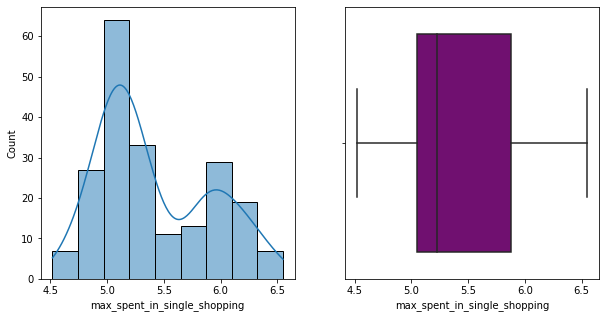

In [60]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(bank_df.max_spent_in_single_shopping, kde=True, ax=axs[0])
sns.boxplot(x='max_spent_in_single_shopping',data=bank_df, ax=axs[1], color='purple')

### Observations:

- From the above descriptive statistics and plots, we see that the max_spent_in_single_shopping field is right skewed and has no outliers.

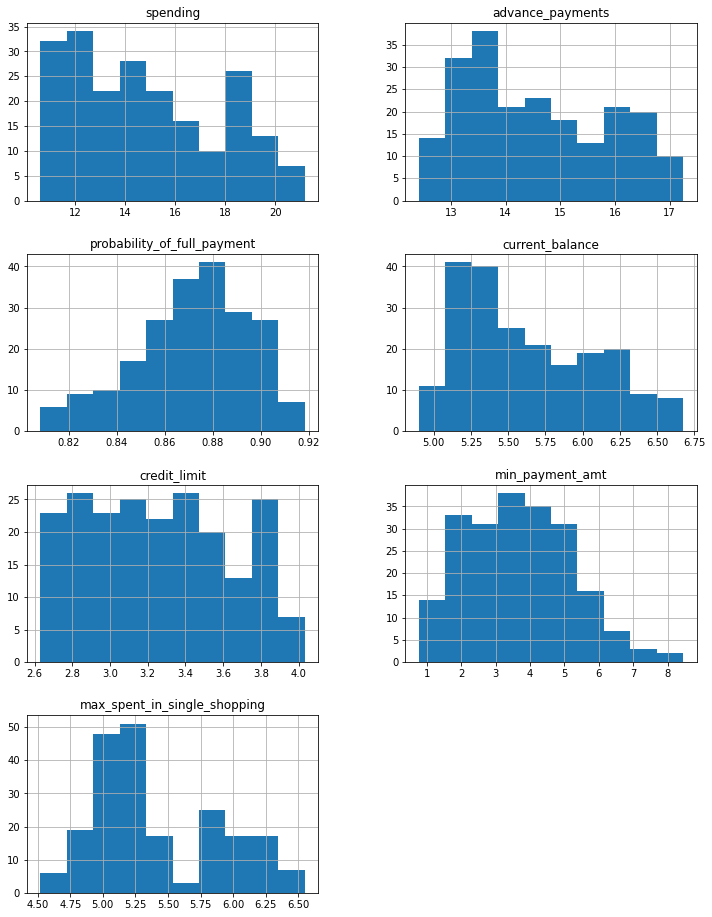

In [61]:
# Let's us only plot the distributions of independent attributes
bank_df.hist(figsize=(12,16),layout=(4,2));

In [62]:
# Let's check the skewness values quantitativel y
bank_df.skew().sort_values(ascending=False)

max_spent_in_single_shopping    0.561897
current_balance                 0.525482
min_payment_amt                 0.401667
spending                        0.399889
advance_payments                0.386573
credit_limit                    0.134378
probability_of_full_payment    -0.537954
dtype: float64

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

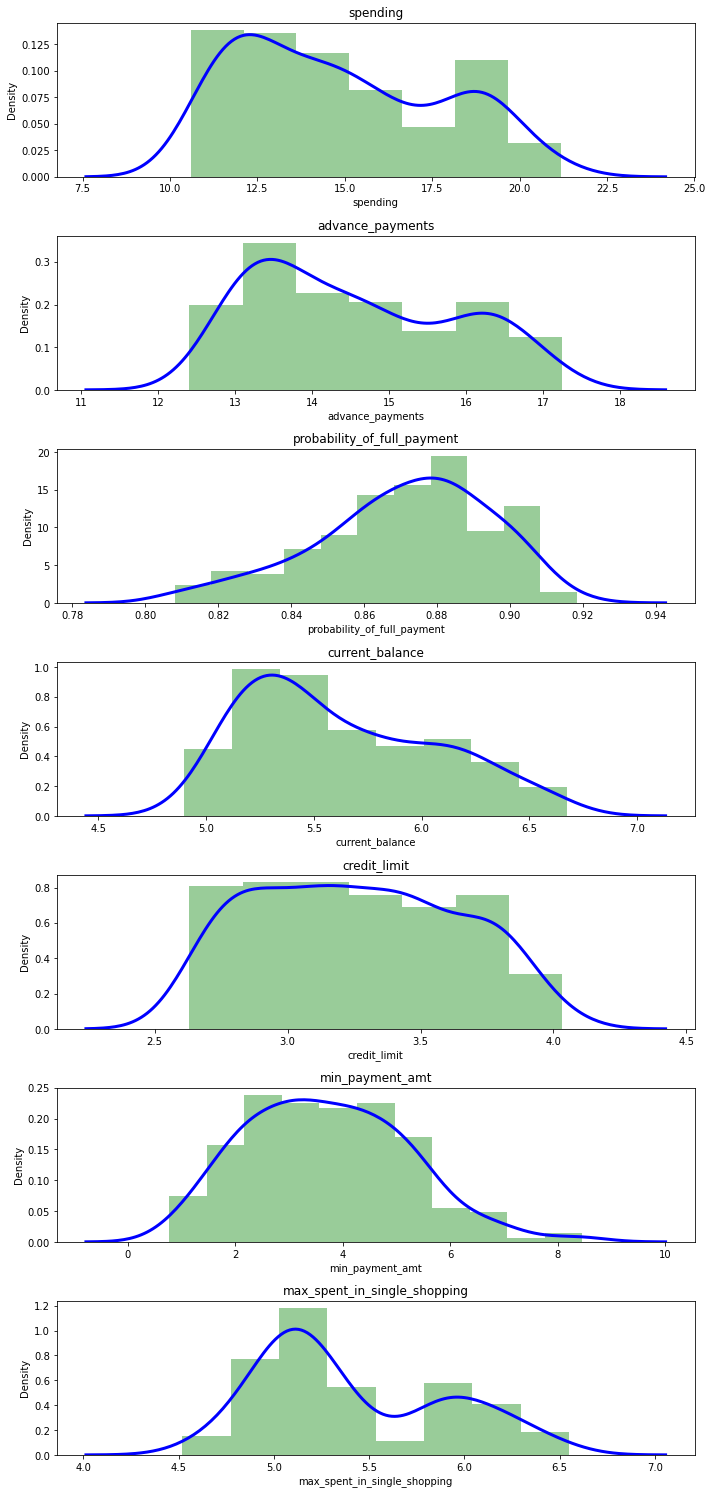

In [63]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 


plt.figure(figsize=(10,50))
for i in range(len(bank_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(bank_df[bank_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(bank_df.columns[i])

plt.tight_layout()

### Observations
- Credit limit average is around $3.258(10000s)
- Distrubtion is skewed to right tail for all the variable execpt probability_of_full_payment variable, which has left tail

## Bivariate Analysis:

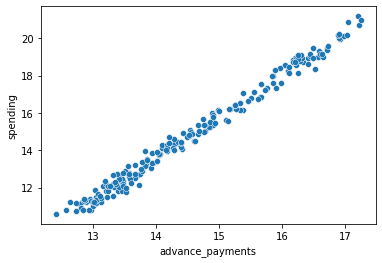

In [64]:
sns.scatterplot(x='advance_payments', y='spending', data=bank_df)
plt.ticklabel_format(style='plain', axis='x')

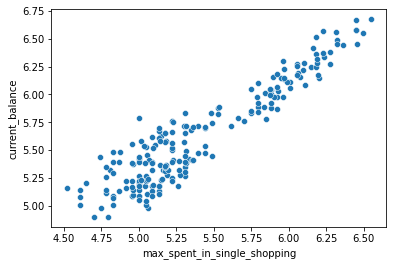

In [65]:
sns.scatterplot(x='max_spent_in_single_shopping', y='current_balance', data=bank_df)	
plt.ticklabel_format(style='plain', axis='x')

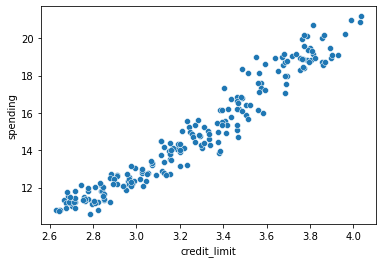

In [66]:
sns.scatterplot(x='credit_limit', y='spending', data=bank_df)	
plt.ticklabel_format(style='plain', axis='x')

## Multivariate analysis

#### Check for multicollinearity

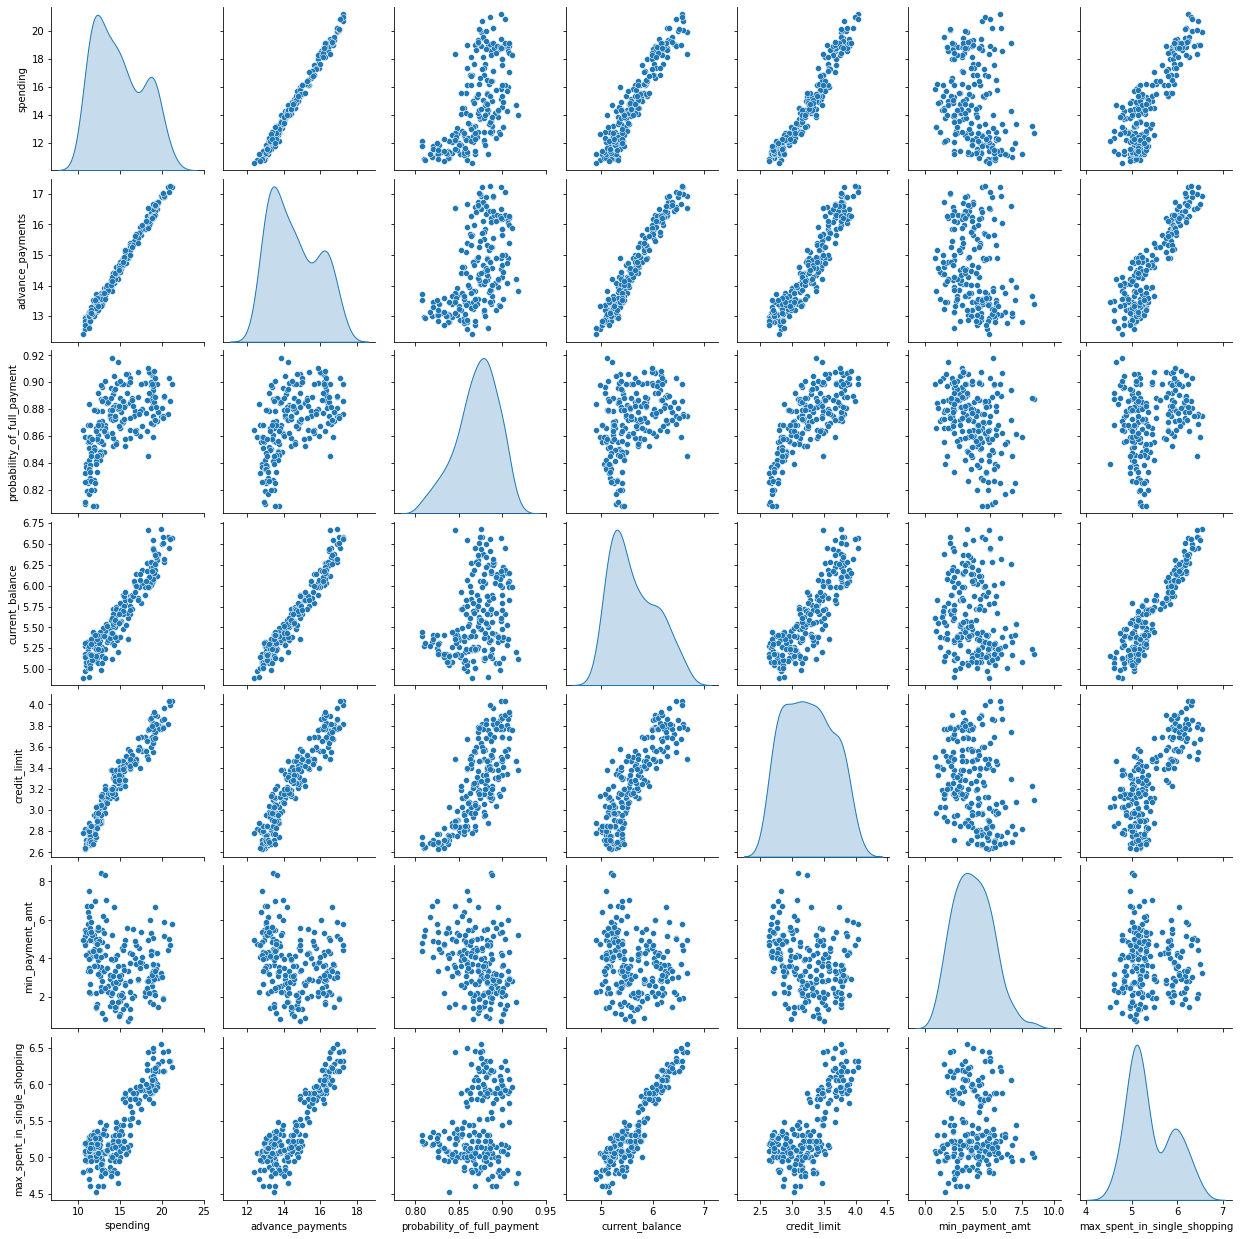

In [67]:
sns.pairplot(bank_df,diag_kind='kde');

The Pair Plot helps us to understand the relationship between all the numerical values in the dataset. On comparing all the variables with each other we could undestand the patterns.The pair plot function in seaborn makes it very easy to generate joint scatter plots for all the columns in the data.

clearly from the above pairplot we can see that all the attributes are not scaled and pre scaling will berequired before performing clustring.

In [68]:
#correlation matrix

corr=bank_df.corr().T
round(corr,2)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.00,0.99,0.61,0.95,0.97,-0.23,0.86
advance_payments,0.99,1.00,0.53,0.97,0.94,-0.22,0.89
probability_of_full_payment,0.61,0.53,1.00,0.37,0.76,-0.33,0.23
current_balance,0.95,0.97,0.37,1.00,0.86,-0.17,0.93
credit_limit,0.97,0.94,0.76,0.86,1.00,-0.26,0.75
min_payment_amt,-0.23,-0.22,-0.33,-0.17,-0.26,1.00,-0.01
max_spent_in_single_shopping,0.86,0.89,0.23,0.93,0.75,-0.01,1.00


### Observation:

Strong positive correlation between:
  - spending & advance_payments, 
  - advance_payments & current_balance, 
  - credit_limit & spending
  - spending & current_balance
  - credit_limit & advance_payments
  - max_spent_in_single_shopping & current_balance

### CORRELATION HEATMAP :

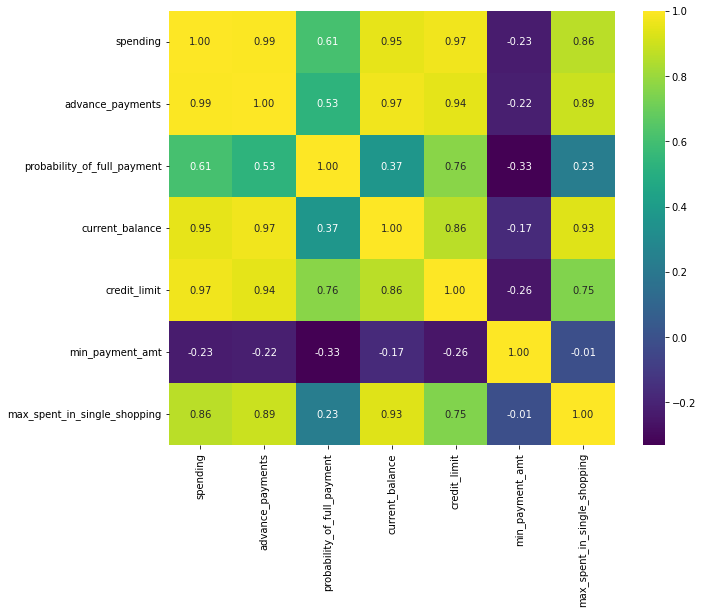

In [69]:
#creating a heatmap for better visualization
plt.figure(figsize=(10,8))
sns.heatmap(bank_df.corr(),annot=True,fmt=".2f",cmap="viridis")
plt.show()

In [70]:
# Let us see the significant correlation either negative or positive among independent attributes..
c = bank_df.corr().abs() # Since there may be positive as well as -ve correlation
s = c.unstack() # 
so = s.sort_values(ascending=False) # Sorting according to the correlation
so=so[(so<1) & (so>0.3)].drop_duplicates().to_frame() # Due to symmetry.. dropping duplicate entries.
so.columns = ['correlation']
so

correlation
advance_payments             spending                         0.994341
                             current_balance                  0.972422
credit_limit                 spending                         0.970771
current_balance              spending                         0.949985
advance_payments             credit_limit                     0.944829
max_spent_in_single_shopping current_balance                  0.932806
advance_payments             max_spent_in_single_shopping     0.890784
spending                     max_spent_in_single_shopping     0.863693
current_balance              credit_limit                     0.860415
probability_of_full_payment  credit_limit                     0.761635
max_spent_in_single_shopping credit_limit                     0.749131
spending                     probability_of_full_payment      0.608288
advance_payments             probability_of_full_payment      0.529244
probability_of_full_payment  current_balance                  0.367915
                             min_payment_amt                  0.331471

### Observations :

This Heat map gives us the correlation between two numerical values.There are considerable number of features that are highly correlated.

- advance_payments variable is highly correlated with spending  and current_balance variable.
- probability_of_full_payment has high correlation with current_balance and min_payment_amt
- max_spent_in_single_shopping is negatively correlated with min_payment_amt


Strategy to remove outliers: We choose to replace attribute outlier values by their respective medians , instead of dropping them, as we will lose other column info and also there outlier are present only in two avariables and within 5 records.

In [71]:
clean_dataset=bank_df.copy()
clean_dataset

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
...,...,...,...,...,...,...,...
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443


In [72]:
def check_outliers(data):
    vData_num = data.loc[:,data.columns != 'class']
    Q1 = vData_num.quantile(0.25)
    Q3 = vData_num.quantile(0.75)
    IQR = Q3 - Q1
    count = 0
    # checking for outliers, True represents outlier
    vData_num_mod = ((vData_num < (Q1 - 1.5 * IQR)) |(vData_num > (Q3 + 1.5 * IQR)))
    #iterating over columns to check for no.of outliers in each of the numerical attributes.
    for col in vData_num_mod:
        if(1 in vData_num_mod[col].value_counts().index):
            print("No. of outliers in %s: %d" %( col, vData_num_mod[col].value_counts().iloc[1]))
            count += 1
    print("\n\nNo of attributes with outliers are :", count)
    
check_outliers(bank_df)

No. of outliers in probability_of_full_payment: 3
No. of outliers in min_payment_amt: 2


No of attributes with outliers are : 2


## let us treat the outliers

In [73]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [74]:
lrprobability,urprobability=remove_outlier(clean_dataset['probability_of_full_payment'])
clean_dataset['probability_of_full_payment']=np.where(clean_dataset['probability_of_full_payment']>urprobability,urprobability,clean_dataset['probability_of_full_payment'])
clean_dataset['probability_of_full_payment']=np.where(clean_dataset['probability_of_full_payment']<lrprobability,lrprobability,clean_dataset['probability_of_full_payment'])


lrpayment,urpayment=remove_outlier(clean_dataset['min_payment_amt'])
clean_dataset['min_payment_amt']=np.where(clean_dataset['min_payment_amt']>urpayment,urpayment,clean_dataset['min_payment_amt'])
clean_dataset['min_payment_amt']=np.where(clean_dataset['min_payment_amt']<lrpayment,lrpayment,clean_dataset['min_payment_amt'])

clean_dataset.shape

(210, 7)

<AxesSubplot:xlabel='min_payment_amt'>

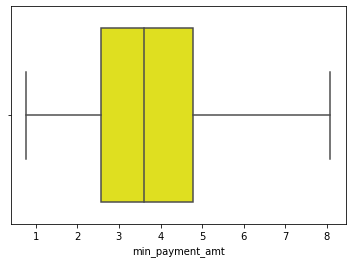

In [75]:
sns.boxplot(x='min_payment_amt',data=clean_dataset, color='yellow')

<AxesSubplot:xlabel='probability_of_full_payment'>

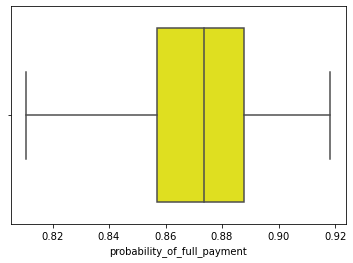

In [75]:
sns.boxplot(x='probability_of_full_payment',data=clean_dataset, color='yellow')

If you look at the box plots above,post treating the outlier there are no outliers in all these columns.

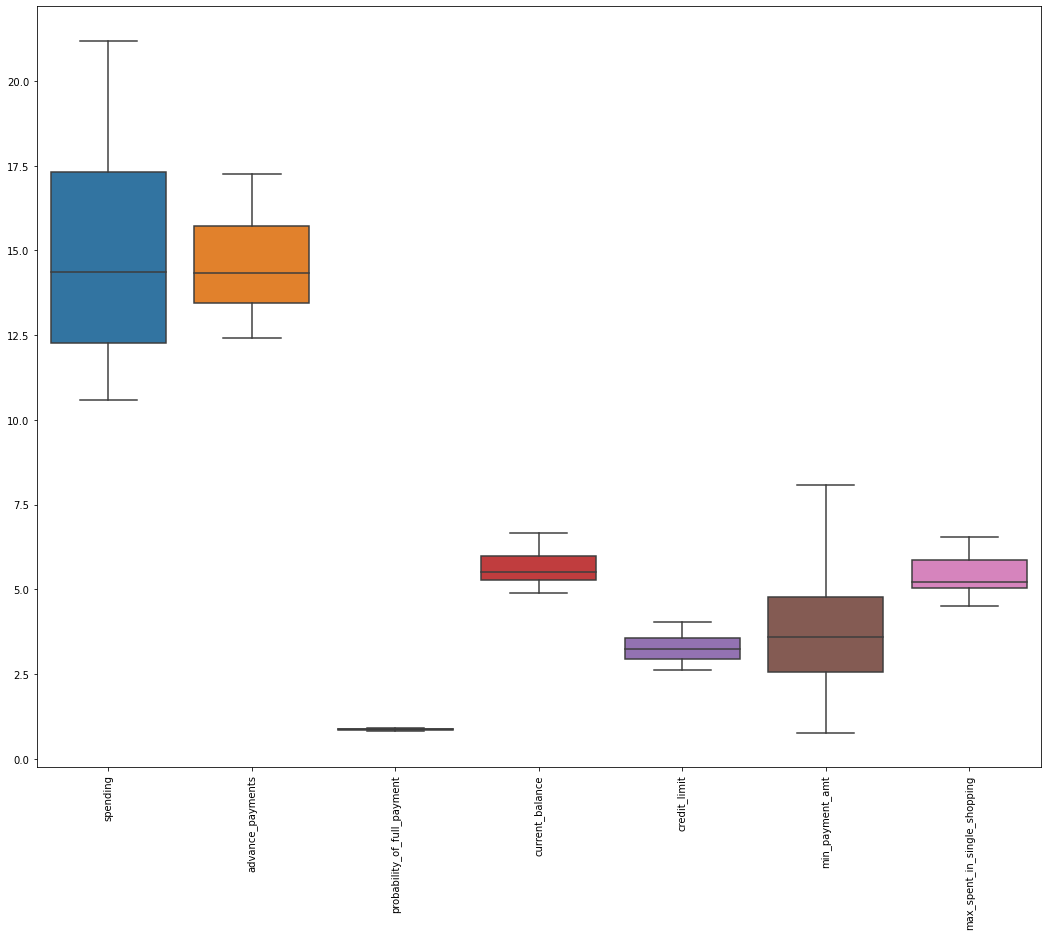

In [76]:
# Let us check presence of outliers
plt.figure(figsize=(18,14))
box = sns.boxplot(data=clean_dataset)
box.set_xticklabels(labels=box.get_xticklabels(),rotation=90);

### Observation :

All the outliers has been treated and now we are good to go.

## 1.2  Do you think scaling is necessary for clustering in this case? Justify

Yes. Clustering algorithms such as K-means do need feature scaling. All the different variables need to be converted to one scale in order to perform meaningful analysis.
Normalization is used to eliminate redundant data and ensures that good quality clusters are generated which can improve the efficiency of clustering algorithms.So it becomes an essential step before clustering as Euclidean distance is very sensitive to the changes in the differences

#### Scaling needs to be done as the values of the variables are different.
spending, advance_payments are in different values and this may get more weightage.
Also have shown below the plot of the data prior and after scaling.
Scaling will have all the values in the relative same range.
I have used zscore to standarised the data to relative same scale -3 to +3.

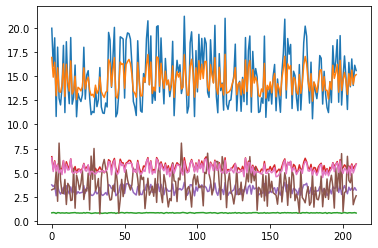

In [77]:
# prior to scaling 
plt.plot(clean_dataset)
plt.show()

In [78]:
# Scaling the attributes.

from scipy.stats import zscore
clean_dataset_Scaled=bank_df.apply(zscore)
clean_dataset_Scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


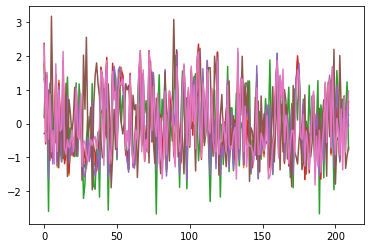

In [79]:
# after scaling
plt.plot(clean_dataset_Scaled)
plt.show()

## 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

Creating the Dendrogram

Importing dendrogram and linkage module

In [80]:
from scipy.cluster.hierarchy import dendrogram, linkage

Choosing average linkage method

In [81]:
link_method = linkage(clean_dataset_Scaled, method = 'average')

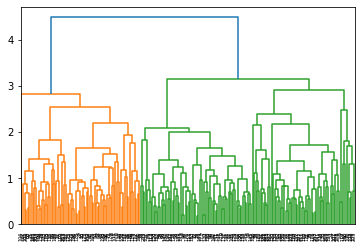

In [82]:
dend = dendrogram(link_method)

Cutting the Dendrogram with suitable clusters

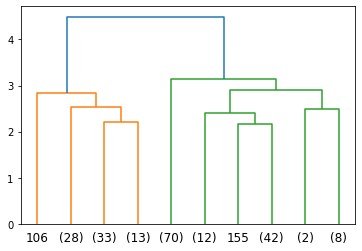

In [84]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 10)

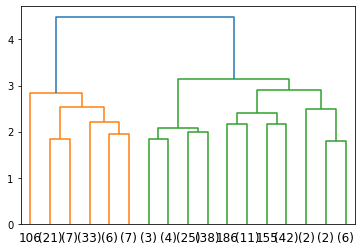

In [85]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 17)

Importing fcluster module to create clusters

In [86]:
from scipy.cluster.hierarchy import fcluster

In [87]:
# Set criterion as maxclust,then create 3 clusters, and store the result in another object 'clusters'

clusters_3 = fcluster(link_method, 3, criterion='maxclust')
clusters_3

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [88]:
cluster3_dataset=bank_df.copy()

In [89]:
cluster3_dataset['clusters-3'] = clusters_3

In [90]:
cluster3_dataset.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters-3
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


Cluster Frequency

In [91]:
cluster3_dataset['clusters-3'].value_counts().sort_index()

1    75
2    70
3    65
Name: clusters-3, dtype: int64

Cluster Profiles

In [92]:
aggdata=cluster3_dataset.groupby('clusters-3').mean()
aggdata['Freq']=cluster3_dataset['clusters-3'].value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters-3,,,,,,,,
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846766,5.258300,2.846000,4.619000,5.115071,70
3,14.217077,14.195846,0.884869,5.442000,3.253508,2.768418,5.055569,65


Another method - ward

In [93]:
wardlink = linkage(clean_dataset_Scaled, method = 'ward')

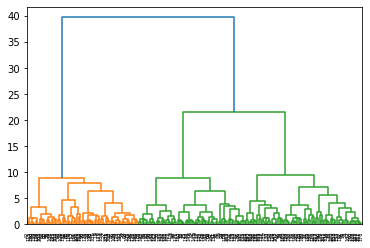

In [94]:
dend_wardlink = dendrogram(wardlink)

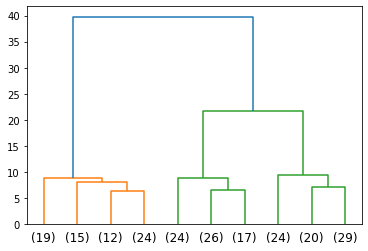

In [95]:
dend_wardlink = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [96]:
clusters_wdlk_3 = fcluster(wardlink, 3, criterion='maxclust')
clusters_wdlk_3

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [97]:
cluster_w_3_dataset=bank_df.copy()

In [98]:
cluster_w_3_dataset['clusters-3'] = clusters_wdlk_3

In [99]:
cluster_w_3_dataset.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters-3
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [100]:
cluster_w_3_dataset['clusters-3'].value_counts().sort_index()

1    70
2    67
3    73
Name: clusters-3, dtype: int64

In [101]:
aggdata_w=cluster_w_3_dataset.groupby('clusters-3').mean()
aggdata_w['Freq']=cluster_w_3_dataset['clusters-3'].value_counts().sort_index()
aggdata_w

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters-3,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


### Observation

- Both the method are almost similer means , minor variation, which we know it occurs.
- We form cluster grouping based on the dendrogram, 3 or 4 looks good. Did the further analysis, and based on the dataset had gone for 3 group cluster solution based on the hierarchical clustering.
- Also in real time, there colud have been more variables value captured - tenure, BALANCE_FREQUENCY, balance, purchase, installment of purchase, others.
-And three group cluster solution gives a pattern based on high/medium/low spending with max_spent_in_single_shopping (high value item) and probability_of_full_payment(payment made).

## 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [102]:
from sklearn.cluster import KMeans 

### Creating Clusters using KMeans

#### Forming 2 Clusters with K=2

In [108]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 2,random_state=1)

In [109]:
k_means.fit(clean_dataset_Scaled)

KMeans(n_clusters=2, random_state=1)

## Cluster Output for all the observations

In [110]:
# Get the labels
k_means.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

### Within Cluster Sum of Squares

In [111]:
k_means.inertia_

659.1717544870411

### Forming clusters with K = 1,3,4,5,6 and comparing the WSS

In [112]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(clean_dataset_Scaled)
k_means.inertia_

C:\Users\Aishwarya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1469.9999999999995

In [113]:
k_means = KMeans(n_clusters = 3)
k_means.fit(clean_dataset_Scaled)
k_means.inertia_

430.65897315130064

In [114]:
k_means = KMeans(n_clusters = 4)
k_means.fit(clean_dataset_Scaled)
k_means.inertia_

371.5811909715524

In [115]:
k_means = KMeans(n_clusters = 5)
k_means.fit(clean_dataset_Scaled)
k_means.inertia_

326.5136953844313

In [122]:
k_means = KMeans(n_clusters = 6)
k_means.fit(clean_dataset_Scaled)
k_means.inertia_

288.76945770226405

WSS reduces as K keeps increasing

### Calculating WSS for other values of K - Elbow Method

In [127]:
wss =[] 

In [128]:
for i in range(1,11):
        KM = KMeans(n_clusters=i)
        KM.fit(clean_dataset_Scaled)
        wss.append(KM.inertia_)

C:\Users\Aishwarya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [129]:
wss  #The sum distance within the centroids.

[1469.9999999999995,
 659.1717544870411,
 430.65897315130064,
 371.35086632242735,
 326.7052868523818,
 288.66177102306943,
 262.0122436349697,
 239.30958567554143,
 223.4698602912642,
 207.55703756263316]

In [130]:
a=[1,2,3,4,5,6,7,8,9,10]

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

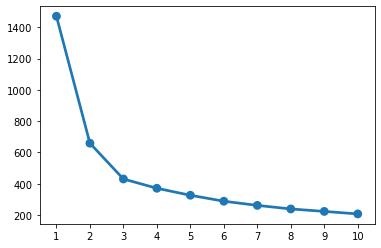

In [131]:
sns.pointplot(a, wss)

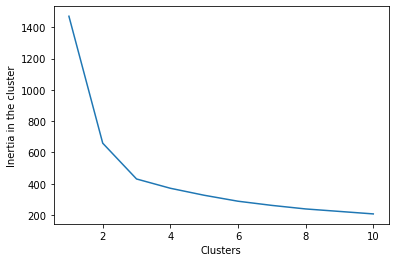

In [132]:
plt.plot(range(1,11), wss)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

### KMeans with K=3

In [133]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(clean_dataset_Scaled)
labels = k_means.labels_

### Cluster evaluation for 3 clusters: the silhouette score

In [134]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [135]:
# Calculating silhouette_score
silhouette_score(clean_dataset_Scaled,labels,random_state=1)

0.40072705527512986

### KMeans with K=4

In [136]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(clean_dataset_Scaled)
labels = k_means.labels_

### Cluster evaluation for 4 clusters

In [137]:
silhouette_score(clean_dataset_Scaled,labels,random_state=1)

0.32757426605518075

#### silhouette score is better for 3 clusters than for 4 clusters. So, final clusters will be 3.

### Appending Clusters to the original dataset

In [143]:
bank_df["Clus_kmeans3"] = labels
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans3
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,3
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


### Cluster Profiling

In [144]:
bank_df.Clus_kmeans3.value_counts().sort_index()

0    67
1    49
2    30
3    64
Name: Clus_kmeans3, dtype: int64

In [145]:
clust_profile=bank_df.copy()
clust_profile=clust_profile.groupby('Clus_kmeans3').mean()
clust_profile['freq']=bank_df.Clus_kmeans3.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
Clus_kmeans3,,,,,,,,
0,13.954179,14.095970,0.881048,5.425612,3.207896,2.593242,5.024149,67
1,19.120000,16.459184,0.886686,6.267265,3.768612,3.472980,6.125878,49
2,16.317333,15.288000,0.876877,5.864800,3.444433,3.868567,5.686533,30
3,11.822656,13.248125,0.845712,5.241187,2.834109,4.954094,5.129891,64


In [146]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [149]:
from sklearn import metrics

In [150]:
scores = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(clean_dataset_Scaled)
    scores.append(metrics.silhouette_score(clean_dataset_Scaled, km.labels_))
    
scores

[0.46577247686580914,
 0.40072705527512986,
 0.3347542296283262,
 0.28621461554288646,
 0.285726896652541,
 0.2756098749293962,
 0.24943558736282168,
 0.2666366921192433,
 0.2731288488219916]

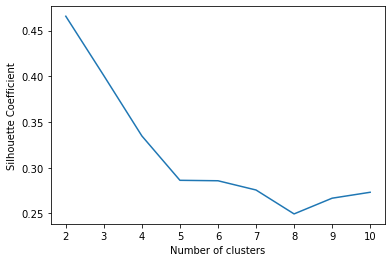

In [151]:
#plotting the sc scores
plt.plot(k_range,scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Insights

From SC Score, the number of optimal clusters could be 3 or 4

## 3 Cluster Solution

In [228]:
km_3 = KMeans(n_clusters=3,random_state=123)

In [229]:
#fitting the Kmeans 
km_3.fit(clean_dataset_Scaled)
km_3.labels_

array([1, 0, 1, 2, 1, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2,
       1, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1,
       2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1,
       1, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0,
       1, 2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       0, 0, 1, 2, 2, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0,
       0, 1, 2, 1, 1, 2, 1, 0, 0, 0, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0,
       2, 0, 0, 2, 0, 1, 1, 2, 1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 0, 1, 1, 1,
       0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 2, 1, 0, 1, 1, 2,
       1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0])

In [230]:
#proportion of labels classified

pd.Series(km_3.labels_).value_counts().sort_index()

0    71
1    67
2    72
dtype: int64

### K-Means Clustering & Cluster Information

In [152]:
kmeans1_dataset=bank_df.copy()

In [153]:
# Fitting K-Means to the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(clean_dataset_Scaled)

#beginning of  the cluster numbering with 1 instead of 0

y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster

cluster = pd.DataFrame(y_kmeans1)

# Adding cluster to the Dataset1

kmeans1_dataset['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(kmeans1_dataset.groupby('cluster').mean(),1))
kmeans_mean_cluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans3
cluster,,,,,,,,
1,14.4,14.3,0.9,5.5,3.3,2.7,5.1,0.3
2,11.9,13.2,0.8,5.2,2.8,4.7,5.1,2.7
3,18.5,16.2,0.9,6.2,3.7,3.6,6.0,1.3


In [154]:
def ClusterPercentage(datafr,name):
    """Common utility function to calculate the percentage and size of cluster"""
    
    size = pd.Series(datafr[name].value_counts().sort_index())
    percent = pd.Series(round(datafr[name].value_counts()/datafr.shape[0] * 100,2)).sort_index()

    size_df = pd.concat([size, percent],axis=1)
    size_df.columns = ["Cluster_Size","Cluster_Percentage"]
    
    return(size_df)

In [160]:
ClusterPercentage(kmeans1_dataset,"cluster")

,Cluster_Size,Cluster_Percentage
1,71,33.81
2,72,34.29
3,67,31.90


In [161]:
#transposing the cluster
cluster_3_T = kmeans_mean_cluster.T

In [162]:
cluster_3_T

cluster,1,2,3
spending,14.4,11.9,18.5
advance_payments,14.3,13.2,16.2
probability_of_full_payment,0.9,0.8,0.9
current_balance,5.5,5.2,6.2
credit_limit,3.3,2.8,3.7
min_payment_amt,2.7,4.7,3.6
max_spent_in_single_shopping,5.1,5.1,6.0
Clus_kmeans3,0.3,2.7,1.3


## Note

### I am going with 3 clusters via kmeans, but based on  the analysis of 4 and 5 kmeans cluster, We observe that based on current dataset given, 3 cluster solution makes sense based on the spending pattern (High, Medium, Low)

### 4-Cluster Solution

In [164]:
km_4 = KMeans(n_clusters=4,random_state=123)

In [165]:
#fitting the Kmeans 
km_4.fit(clean_dataset_Scaled)
km_4.labels_

array([0, 3, 0, 1, 0, 1, 1, 3, 0, 1, 0, 2, 1, 0, 3, 1, 3, 1, 3, 1, 1, 1,
       0, 1, 3, 2, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 0, 3, 2, 0,
       1, 1, 3, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 3, 1, 1, 2, 3, 0,
       0, 3, 0, 3, 3, 1, 0, 0, 1, 0, 3, 1, 2, 3, 3, 3, 3, 0, 1, 2, 2, 2,
       2, 1, 3, 0, 3, 1, 3, 0, 0, 2, 1, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 0,
       2, 3, 0, 1, 1, 2, 3, 2, 1, 0, 3, 1, 1, 1, 3, 3, 0, 1, 3, 3, 1, 3,
       3, 0, 1, 0, 0, 1, 2, 3, 2, 3, 1, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 2,
       3, 3, 3, 1, 3, 0, 0, 1, 0, 2, 0, 1, 2, 3, 3, 1, 3, 1, 3, 0, 0, 0,
       3, 3, 2, 1, 3, 3, 3, 3, 2, 2, 3, 2, 3, 1, 3, 3, 1, 0, 3, 2, 0, 1,
       0, 1, 3, 2, 3, 1, 2, 3, 2, 3, 2, 2])

In [166]:
#proportion of labels classified

pd.Series(km_4.labels_).value_counts()

3    65
1    64
0    51
2    30
dtype: int64

K-Means Clustering & Cluster Information

In [167]:
kmeans14_dataset=bank_df.copy()

In [168]:
# Fitting K-Means to the dataset

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(clean_dataset_Scaled)

#beginning of  the cluster numbering with 1 instead of 0

y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster

cluster = pd.DataFrame(y_kmeans1)

# Adding cluster to the Dataset1
kmeans14_dataset['cluster'] = cluster
#Mean of clusters

kmeans_mean_cluster = pd.DataFrame(round(kmeans14_dataset.groupby('cluster').mean(),1))
kmeans_mean_cluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans3
cluster,,,,,,,,
1,19.1,16.4,0.9,6.3,3.8,3.5,6.1,1.0
2,11.9,13.3,0.8,5.2,2.8,4.9,5.1,2.8
3,16.1,15.2,0.9,5.8,3.4,4.0,5.6,1.9
4,14.1,14.1,0.9,5.4,3.2,2.4,5.0,0.0


In [169]:
ClusterPercentage(kmeans14_dataset,"cluster")

,Cluster_Size,Cluster_Percentage
1,51,24.29
2,68,32.38
3,30,14.29
4,61,29.05


In [172]:
#transposing the cluster
cluster_4_T = kmeans_mean_cluster.T

In [173]:
cluster_4_T

cluster,1,2,3,4
spending,19.1,11.9,16.1,14.1
advance_payments,16.4,13.3,15.2,14.1
probability_of_full_payment,0.9,0.8,0.9,0.9
current_balance,6.3,5.2,5.8,5.4
credit_limit,3.8,2.8,3.4,3.2
min_payment_amt,3.5,4.9,4.0,2.4
max_spent_in_single_shopping,6.1,5.1,5.6,5.0
Clus_kmeans3,1.0,2.8,1.9,0.0


## 5 cluster

In [188]:
km_5 = KMeans(n_clusters=5,random_state=123)

In [189]:
kmeans15_dataset=bank_df.copy()

In [190]:
#fitting the Kmeans 
km_5.fit(clean_dataset_Scaled)
km_5.labels_

array([1, 0, 1, 4, 1, 2, 2, 0, 1, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 4,
       1, 2, 0, 3, 0, 4, 4, 4, 0, 2, 2, 0, 4, 4, 4, 2, 4, 1, 1, 0, 3, 1,
       4, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 3, 2, 4, 4, 1, 0, 2, 4, 3, 0, 1,
       1, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 4, 3, 0, 0, 0, 0, 1, 4, 3, 3, 3,
       3, 2, 0, 1, 0, 4, 2, 1, 1, 3, 4, 3, 2, 1, 0, 1, 0, 1, 1, 4, 2, 1,
       3, 0, 1, 4, 4, 3, 0, 2, 4, 1, 2, 4, 2, 2, 0, 0, 1, 4, 0, 0, 4, 0,
       2, 1, 4, 3, 1, 2, 3, 0, 3, 0, 4, 2, 2, 2, 1, 4, 0, 4, 0, 2, 0, 3,
       2, 0, 2, 4, 0, 3, 1, 2, 1, 3, 1, 2, 3, 0, 0, 2, 0, 4, 0, 1, 1, 1,
       0, 2, 3, 2, 0, 2, 0, 0, 3, 3, 2, 3, 0, 4, 2, 0, 4, 1, 0, 3, 1, 2,
       1, 4, 0, 3, 0, 4, 3, 0, 3, 0, 0, 3])

In [191]:
# Fitting K-Means to the dataset

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(clean_dataset_Scaled)

#beginning of  the cluster numbering with 1 instead of 0

y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster

cluster = pd.DataFrame(y_kmeans1)

# Adding cluster to the Dataset1

kmeans15_dataset['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(kmeans15_dataset.groupby('cluster').mean(),1))
kmeans_mean_cluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans3
cluster,,,,,,,,
1,11.6,13.2,0.8,5.3,2.8,4.7,5.2,3.0
2,19.1,16.4,0.9,6.3,3.8,3.5,6.1,1.0
3,14.2,14.2,0.9,5.5,3.2,2.3,5.0,0.0
4,12.3,13.3,0.9,5.2,3.0,5.0,5.0,2.1
5,16.2,15.2,0.9,5.9,3.4,3.9,5.7,1.9


In [192]:
ClusterPercentage(kmeans15_dataset,"cluster")

,Cluster_Size,Cluster_Percentage
1,39,18.57
2,50,23.81
3,55,26.19
4,36,17.14
5,30,14.29


In [193]:
#transposing the cluster
cluster_5_T = kmeans_mean_cluster.T

In [195]:
cluster_5_T

cluster,1,2,3,4,5
spending,11.6,19.1,14.2,12.3,16.2
advance_payments,13.2,16.4,14.2,13.3,15.2
probability_of_full_payment,0.8,0.9,0.9,0.9,0.9
current_balance,5.3,6.3,5.5,5.2,5.9
credit_limit,2.8,3.8,3.2,3.0,3.4
min_payment_amt,4.7,3.5,2.3,5.0,3.9
max_spent_in_single_shopping,5.2,6.1,5.0,5.0,5.7
Clus_kmeans3,3.0,1.0,0.0,2.1,1.9


## 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

## 3 group cluster via Kmeans

In [252]:
cluster_3_T

cluster,1,2,3
spending,14.4,11.9,18.5
advance_payments,14.3,13.2,16.2
probability_of_full_payment,0.9,0.8,0.9
current_balance,5.5,5.2,6.2
credit_limit,3.3,2.8,3.7
min_payment_amt,2.7,4.7,3.6
max_spent_in_single_shopping,5.1,5.1,6.0
Clus_kmeans4,0.3,2.7,1.3
Clus_kmeans3,0.3,2.7,1.3


### 3 group cluster via hierarchical clustering

In [253]:
aggdata_w.T

clusters-3,1,2,3
spending,18.371429,11.872388,14.199041
advance_payments,16.145429,13.257015,14.233562
probability_of_full_payment,0.884400,0.848072,0.879190
current_balance,6.158171,5.238940,5.478233
credit_limit,3.684629,2.848537,3.226452
min_payment_amt,3.639157,4.949433,2.612181
max_spent_in_single_shopping,6.017371,5.122209,5.086178
Freq,70.000000,67.000000,73.000000


## Cluster Group Profiles

Group 1 : High Spending
    
Group 3 : Medium Spending
    
Group 2 : Low Spending
    
Promotional strategies for each cluster

### Group 1 : High Spending Group

- Giving any reward points might increase their purchases.
- maximum max_spent_in_single_shopping is high for this group, so can be offered discount/offer on next transactions upon full payment
- Increase there credit limit and 
- Increase spending habits
- Give loan against the credit card, as they are customers with good repayment record.
- Tie up with luxary brands, which will drive more one_time_maximun spending

### Group 3 : Medium Spending Group
- They are potential target customers who are paying bills and doing purchases and maintaining comparatively good credit score. So we can increase credit limit or can lower down interest rate. 
- Promote premium cards/loyality cars to increase transcations.
- Increase spending habits by trying with premium ecommerce sites, travel portal, travel airlines/hotel, as this will encourge them to spend more

### Group 2 : Low Spending Group
- customers should be given remainders for payments. Offers can be provided on early payments to improve their payment rate.
- Increase there spending habits by tieing up with grocery stores, utlities (electircity, phone, gas, others)

# Problem 2: CART-RF-ANN

### An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

### Attribute Information:

- Target: Claim Status (Claimed)
- Code of tour firm (Agency_Code)
- Type of tour insurance firms (Type)
- Distribution channel of tour insurance agencies (Channel)
- Name of the tour insurance products (Product)
- Duration of the tour (Duration)
- Destination of the tour (Destination)
- Amount of sales of tour insurance policies (Sales)
- The commission received for tour insurance firm (Commission)
- Age of insured (Age)

# 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [263]:
df = pd.read_csv("insurance_part2_data (1).csv")

## Checking the data

In [264]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


### Observation:
- 10 variables
- Age, Commision, Duration, Sales are numeric variable
- rest are categorial variables
- 3000 records, no missing one
- 9 independant variable and one target variable - Clamied

## Check for missing value in any column

In [266]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

### Observation:

No missing value.

## Descriptive Statistics Summary

In [267]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [268]:
## Intital descriptive analysis of the data

df.describe(percentiles=[.25,0.50,0.75,0.90]).T

,count,mean,std,min,25%,50%,75%,90%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,53.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,48.300,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,224.200,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,172.025,539.00


In [269]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.001333,134.053313,-1.0,11.0,26.5,63.0,4580.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observation:

- Duration has negative valu, which is not possible.
- Commision & Sales- mean and median varies signficantly.
- Categorial code variable maximun unique count is 5

In [270]:
df.shape

(3000, 10)

## Getting unique counts of all Nominal Variables:

In [271]:
for column in df[['Agency_Code', 'Type', 'Claimed', 'Channel', 
                  'Product Name', 'Destination']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




## Check for duplicate data :

In [272]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


### Removing Duplicates - Not removing them - no unique identifier, can be different customer.

Though it shows there are 139 records, but it can be of different customers, there is no customer ID or any unique identifier, so I am not dropping them off.

## Univariate Analysis :

## Age variable

In [273]:
df.Age.describe()

count    3000.000000
mean       38.091000
std        10.463518
min         8.000000
25%        32.000000
50%        36.000000
75%        42.000000
max        84.000000
Name: Age, dtype: float64

In [274]:
print('Range of values: ', df['Age'].max()-df['Age'].min())

Range of values:  76


In [275]:
#Central values 
print('Minimum Age: ', df['Age'].min())
print('Maximum Age: ',df['Age'].max())
print('Mean value: ', df['Age'].mean())
print('Median value: ',df['Age'].median())
print('Standard deviation: ', df['Age'].std())
print('Null values: ',df['Age'].isnull().any())

Minimum Age:  8
Maximum Age:  84
Mean value:  38.091
Median value:  36.0
Standard deviation:  10.463518245377944
Null values:  False


In [276]:
#Quartiles

Q1=df['Age'].quantile(q=0.25)
Q3=df['Age'].quantile(q=0.75)
print('spending - 1st Quartile (Q1) is: ', Q1)
print('spending - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Age is ', stats.iqr(df['Age']))

spending - 1st Quartile (Q1) is:  32.0
spending - 3st Quartile (Q3) is:  42.0
Interquartile range (IQR) of Age is  10.0


In [277]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Age: ', L_outliers)
print('Upper outliers in Age: ', U_outliers)

Lower outliers in Age:  17.0
Upper outliers in Age:  57.0


In [278]:
print('Number of outliers in Age upper : ', df[df['Age']>57.0]['Age'].count())
print('Number of outliers in Age lower : ', df[df['Age']<17.0]['Age'].count())
print('% of Outlier in Age upper: ',round(df[df['Age']>57.0]['Age'].count()*100/len(df)), '%')
print('% of Outlier in Age lower: ',round(df[df['Age']<17.0]['Age'].count()*100/len(df)), '%')

Number of outliers in Age upper :  198
Number of outliers in Age lower :  6
% of Outlier in Age upper:  7 %
% of Outlier in Age lower:  0 %


<AxesSubplot:title={'center':'Age'}>

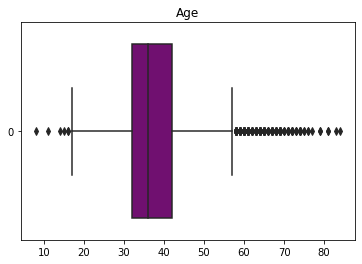

In [279]:
plt.title('Age')
sns.boxplot(data=df['Age'],orient='horizondal',color='purple')

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


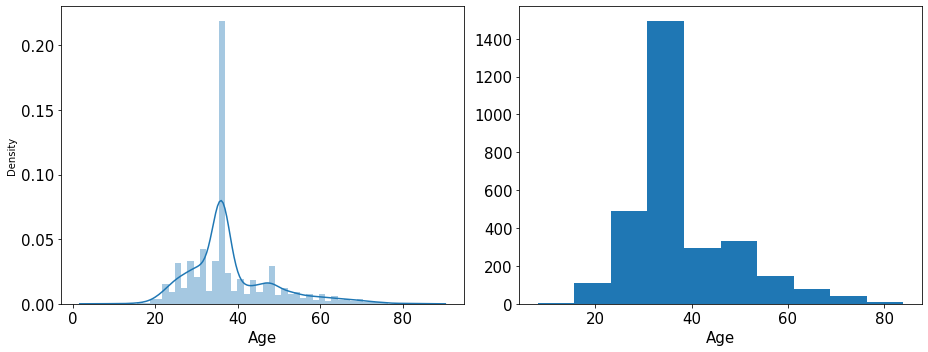

In [281]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['Age'],ax=ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Age'])
ax3.set_xlabel('Age', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Commision variable

In [282]:
df.Commision.describe()

count    3000.000000
mean       14.529203
std        25.481455
min         0.000000
25%         0.000000
50%         4.630000
75%        17.235000
max       210.210000
Name: Commision, dtype: float64

In [283]:
print('Range of values: ', df['Commision'].max()-df['Commision'].min())

Range of values:  210.21


In [284]:
#Central values 
print('Minimum Commision: ', df['Commision'].min())
print('Maximum Commision: ',df['Commision'].max())
print('Mean value: ', df['Commision'].mean())
print('Median value: ',df['Commision'].median())
print('Standard deviation: ', df['Commision'].std())
print('Null values: ',df['Commision'].isnull().any())

Minimum Commision:  0.0
Maximum Commision:  210.21
Mean value:  14.529203333333266
Median value:  4.63
Standard deviation:  25.48145450662553
Null values:  False


In [286]:
#Quartiles

Q1=df['Commision'].quantile(q=0.25)
Q3=df['Commision'].quantile(q=0.75)
print('Commision - 1st Quartile (Q1) is: ', Q1)
print('Commision - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Commision is ', stats.iqr(df['Commision']))

Commision - 1st Quartile (Q1) is:  0.0
Commision - 3st Quartile (Q3) is:  17.235
Interquartile range (IQR) of Commision is  17.235


In [287]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Commision: ', L_outliers)
print('Upper outliers in Commision: ', U_outliers)

Lower outliers in Commision:  -25.8525
Upper outliers in Commision:  43.0875


In [288]:
print('Number of outliers in Commision upper : ', df[df['Commision']>43.0875]['Commision'].count())
print('Number of outliers in Commision lower : ', df[df['Commision']<-25.8525]['Commision'].count())
print('% of Outlier in Commision upper: ',round(df[df['Commision']>43.0875]['Commision'].count()*100/len(df)), '%')
print('% of Outlier in Commision lower: ',round(df[df['Commision']<-25.8525]['Commision'].count()*100/len(df)), '%')

Number of outliers in Commision upper :  362
Number of outliers in Commision lower :  0
% of Outlier in Commision upper:  12 %
% of Outlier in Commision lower:  0 %


<AxesSubplot:title={'center':'Commision'}>

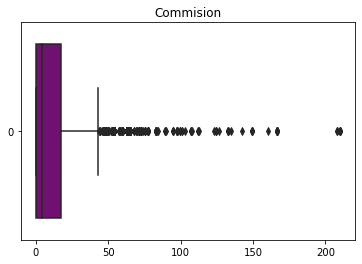

In [317]:
plt.title('Commision')
sns.boxplot(data=df['Commision'],orient='horizondal',color='purple')

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


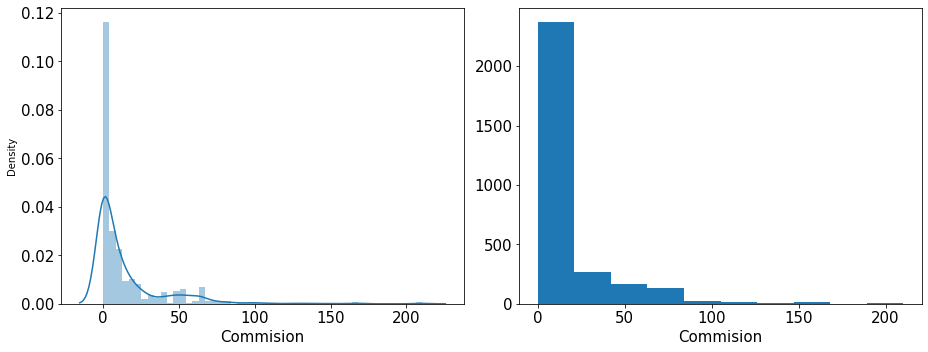

In [318]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['Commision'],ax=ax2)
ax2.set_xlabel('Commision', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Commision'])
ax3.set_xlabel('Commision', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Duration variable:

In [319]:
df.Duration.describe()

count    3000.000000
mean       70.001333
std       134.053313
min        -1.000000
25%        11.000000
50%        26.500000
75%        63.000000
max      4580.000000
Name: Duration, dtype: float64

In [320]:
print('Range of values: ', df['Duration'].max()-df['Duration'].min())

Range of values:  4581


In [321]:
#Central values 
print('Minimum Duration: ', df['Duration'].min())
print('Maximum Duration: ',df['Duration'].max())
print('Mean value: ', df['Duration'].mean())
print('Median value: ',df['Duration'].median())
print('Standard deviation: ', df['Duration'].std())
print('Null values: ',df['Duration'].isnull().any())

Minimum Duration:  -1
Maximum Duration:  4580
Mean value:  70.00133333333333
Median value:  26.5
Standard deviation:  134.05331313253495
Null values:  False


In [322]:
#Quartiles

Q1=df['Duration'].quantile(q=0.25)
Q3=df['Duration'].quantile(q=0.75)
print('Duration - 1st Quartile (Q1) is: ', Q1)
print('Duration - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Duration is ', stats.iqr(df['Duration']))

Duration - 1st Quartile (Q1) is:  11.0
Duration - 3st Quartile (Q3) is:  63.0
Interquartile range (IQR) of Duration is  52.0


In [323]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Duration: ', L_outliers)
print('Upper outliers in Duration: ', U_outliers)

Lower outliers in Duration:  -67.0
Upper outliers in Duration:  141.0


In [324]:
print('Number of outliers in Duration upper : ', df[df['Duration']>141.0]['Duration'].count())
print('Number of outliers in Duration lower : ', df[df['Duration']<-67.0]['Duration'].count())
print('% of Outlier in Duration upper: ',round(df[df['Duration']>141.0]['Duration'].count()*100/len(df)), '%')
print('% of Outlier in Duration lower: ',round(df[df['Duration']<-67.0]['Duration'].count()*100/len(df)), '%')

Number of outliers in Duration upper :  382
Number of outliers in Duration lower :  0
% of Outlier in Duration upper:  13 %
% of Outlier in Duration lower:  0 %


<AxesSubplot:title={'center':'Duration'}>

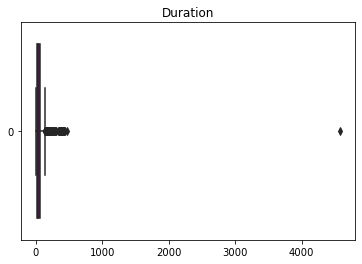

In [325]:
plt.title('Duration')
sns.boxplot(data=df['Duration'],orient='horizondal',color='purple')

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


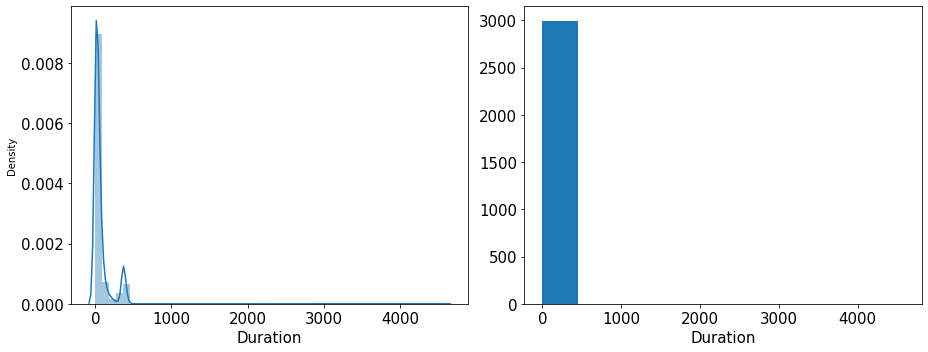

In [326]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['Duration'],ax=ax2)
ax2.set_xlabel('Duration', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Duration'])
ax3.set_xlabel('Duration', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Sales variable:

In [327]:
df.Sales.describe()

count    3000.000000
mean       60.249913
std        70.733954
min         0.000000
25%        20.000000
50%        33.000000
75%        69.000000
max       539.000000
Name: Sales, dtype: float64

In [328]:
print('Range of values: ', df['Sales'].max()-df['Sales'].min())

Range of values:  539.0


In [329]:
#Central values 
print('Minimum Sales: ', df['Sales'].min())
print('Maximum Sales: ',df['Sales'].max())
print('Mean value: ', df['Sales'].mean())
print('Median value: ',df['Sales'].median())
print('Standard deviation: ', df['Sales'].std())
print('Null values: ',df['Sales'].isnull().any())

Minimum Sales:  0.0
Maximum Sales:  539.0
Mean value:  60.24991333333344
Median value:  33.0
Standard deviation:  70.73395353143047
Null values:  False


In [330]:
#Quartiles

Q1=df['Sales'].quantile(q=0.25)
Q3=df['Sales'].quantile(q=0.75)
print('Sales - 1st Quartile (Q1) is: ', Q1)
print('Sales - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Sales is ', stats.iqr(df['Sales']))

Sales - 1st Quartile (Q1) is:  20.0
Sales - 3st Quartile (Q3) is:  69.0
Interquartile range (IQR) of Sales is  49.0


In [331]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Sales: ', L_outliers)
print('Upper outliers in Sales: ', U_outliers)

Lower outliers in Sales:  -53.5
Upper outliers in Sales:  142.5


In [332]:
print('Number of outliers in Sales upper : ', df[df['Sales']>142.5]['Sales'].count())
print('Number of outliers in Sales lower : ', df[df['Sales']<-53.5]['Sales'].count())
print('% of Outlier in Sales upper: ',round(df[df['Sales']>142.5]['Sales'].count()*100/len(df)), '%')
print('% of Outlier in Sales lower: ',round(df[df['Sales']<-53.5]['Sales'].count()*100/len(df)), '%')

Number of outliers in Sales upper :  353
Number of outliers in Sales lower :  0
% of Outlier in Sales upper:  12 %
% of Outlier in Sales lower:  0 %


<AxesSubplot:title={'center':'Sales'}>

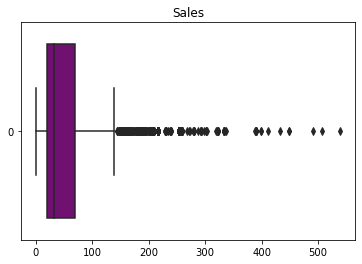

In [333]:
plt.title('Sales')
sns.boxplot(data=df['Sales'],orient='horizondal',color='purple')

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


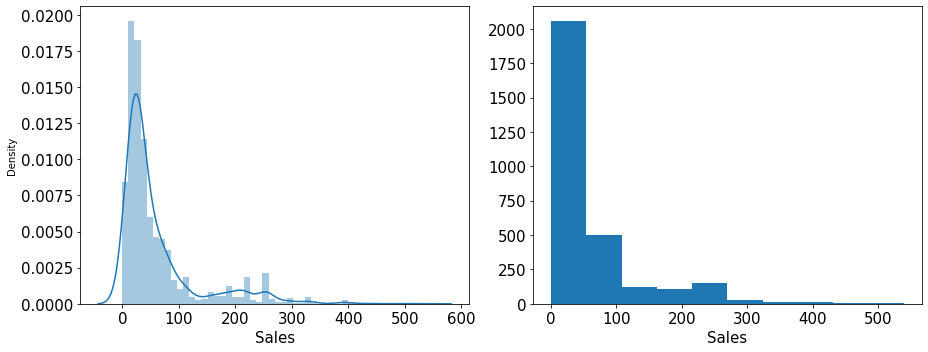

In [334]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['Sales'],ax=ax2)
ax2.set_xlabel('Sales', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Sales'])
ax3.set_xlabel('Sales', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### There are outliers in all the variables, but the sales and commision can be a geneui business value. Random Forest and CART can handle the outliers. Hence, Outliers are not treated for now, we will keep the data as it is.

### I will treat the outliers for the ANN model to compare the same after the all the steps just for comparsion.

## Categorical Variables :

## Agency_Code

### Count Plot

<AxesSubplot:xlabel='Agency_Code', ylabel='count'>

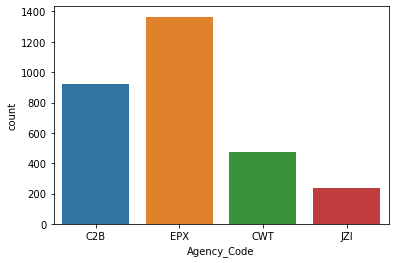

In [335]:
sns.countplot(data = df, x = 'Agency_Code')

### Boxplot

<AxesSubplot:xlabel='Agency_Code', ylabel='Sales'>

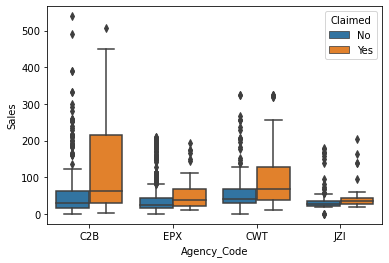

In [336]:
sns.boxplot(data = df, x='Agency_Code',y='Sales', hue='Claimed')

## Type

### Countplot

<AxesSubplot:xlabel='Type', ylabel='count'>

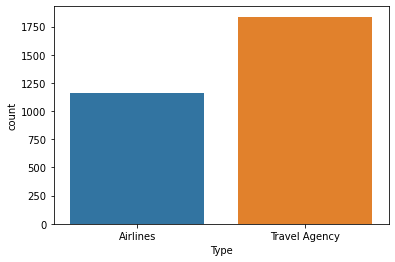

In [337]:
sns.countplot(data = df, x = 'Type')

### Boxplot

<AxesSubplot:xlabel='Type', ylabel='Sales'>

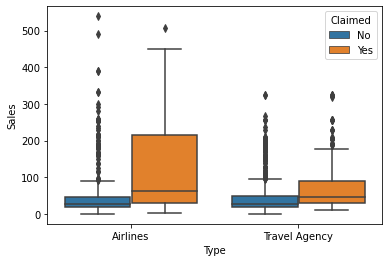

In [338]:
sns.boxplot(data = df, x='Type',y='Sales', hue='Claimed')

## Channel

<AxesSubplot:xlabel='Channel', ylabel='count'>

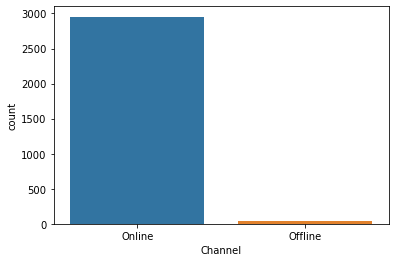

In [339]:
sns.countplot(data = df, x = 'Channel')

<AxesSubplot:xlabel='Channel', ylabel='Sales'>

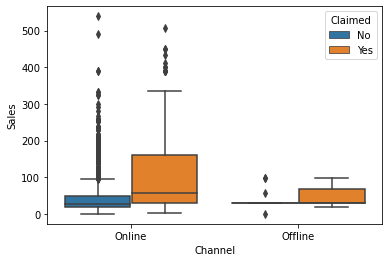

In [340]:
sns.boxplot(data = df, x='Channel',y='Sales', hue='Claimed')

## Product Name

<AxesSubplot:xlabel='Product Name', ylabel='count'>

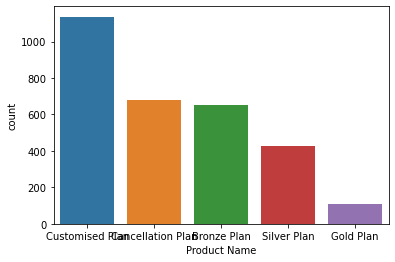

In [341]:
sns.countplot(data = df, x = 'Product Name')

<AxesSubplot:xlabel='Product Name', ylabel='Sales'>

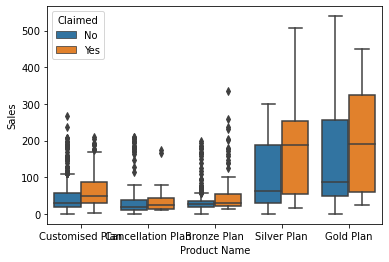

In [342]:
sns.boxplot(data = df, x='Product Name',y='Sales', hue='Claimed')

## Destination

<AxesSubplot:xlabel='Destination', ylabel='count'>

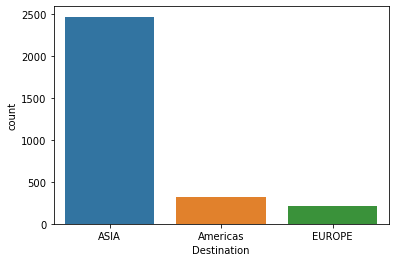

In [343]:
sns.countplot(data = df, x = 'Destination')

<AxesSubplot:xlabel='Destination', ylabel='Sales'>

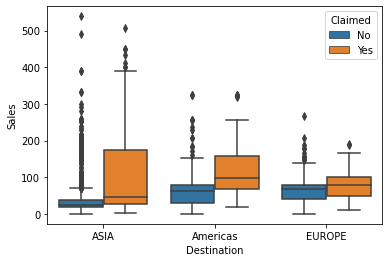

In [344]:
sns.boxplot(data = df, x='Destination',y='Sales', hue='Claimed')

## Checking pairwise distribution of the continuous variables

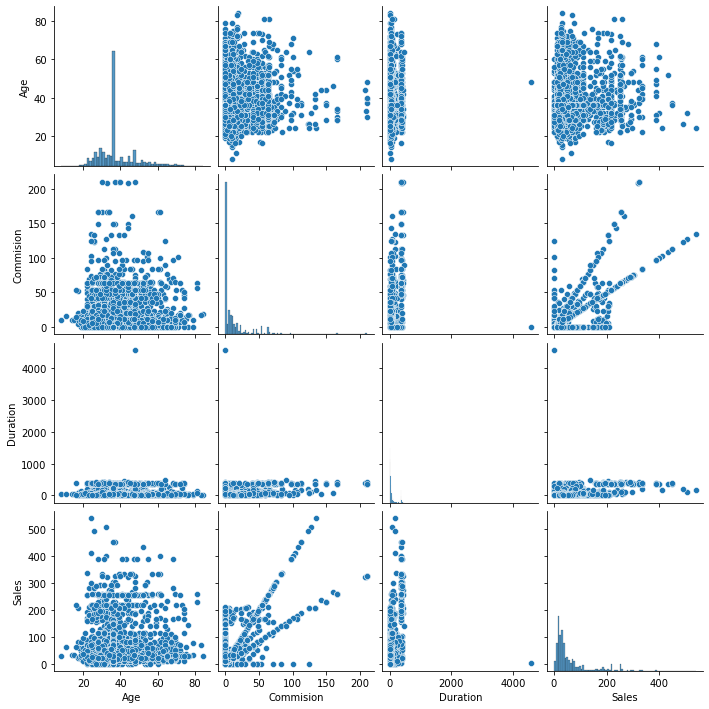

In [345]:
sns.pairplot(df[['Age', 'Commision', 
    'Duration', 'Sales']])

## Checking for Correlations

<AxesSubplot:>

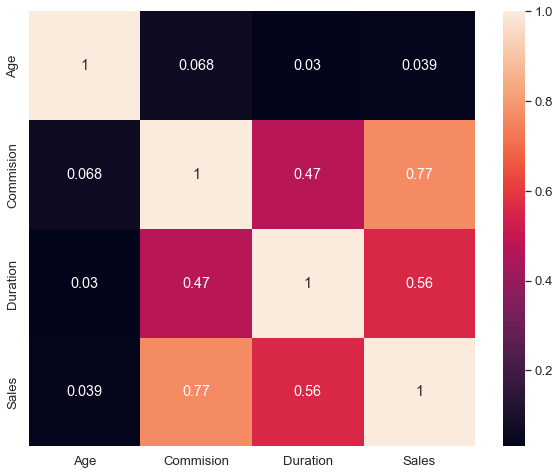

In [346]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df[['Age', 'Commision', 
    'Duration', 'Sales']].corr(), annot=True)

## Converting all objects to categorical codes

In [347]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [348]:
## Rechecking the information of the given data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [349]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


## Proportion of 1s and 0s

In [350]:
df.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

# 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

### Extracting the target column into separate vectors for training set and test set

In [351]:
X = df.drop("Claimed", axis=1)

y = df.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


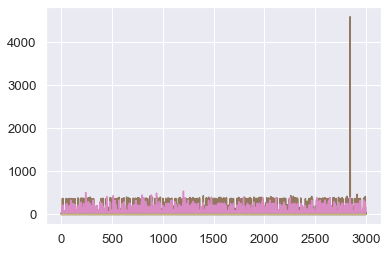

In [352]:
# prior to scaling 
plt.plot(X)
plt.show()

In [353]:
# Scaling the attributes.

from scipy.stats import zscore
X_scaled=X.apply(zscore)
X_scaled.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,0.947162,-1.314358,-1.256796,-0.542807,0.124788,-0.470051,-0.816433,0.268835,-0.434646
1,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.268605,-0.569127,0.268835,-0.434646
2,0.086888,-0.308215,0.795674,-0.337133,0.124788,-0.499894,-0.711940,0.268835,1.303937
3,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.492433,-0.484288,-0.525751,-0.434646
4,-0.486629,1.704071,-1.256796,-0.323003,0.124788,-0.126846,-0.597407,-1.320338,-0.434646


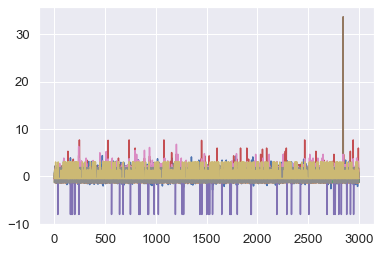

In [354]:
# prior to scaling 
plt.plot(X_scaled)
plt.show()

## Splitting data into training and test set

In [355]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X_scaled, y, test_size=.30, random_state=5)

## Checking the dimensions of the training and test data

In [356]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)


## Building a Decision Tree Classifier

In [358]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [359]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=450,
                       random_state=1)

In [360]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [3, 5, 7, 10,12],
    'min_samples_leaf': [20,30,40,50,60], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [160]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, min_samples_split=150,
                       random_state=1)

In [161]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [3.5,4.0,4.5, 5.0,5.5],
    'min_samples_leaf': [40, 42, 44,46,48,50,52,54], 
    'min_samples_split': [250, 270, 280, 290, 300,310],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [162]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}

{'criterion': 'gini', 'max_depth': 3.5, 'min_samples_leaf': 44, 'min_samples_split': 250}


DecisionTreeClassifier(max_depth=3.5, min_samples_leaf=44,
                       min_samples_split=250, random_state=1)

In [163]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [4.85, 4.90,4.95, 5.0,5.05,5.10,5.15],
    'min_samples_leaf': [40, 41, 42, 43, 44], 
    'min_samples_split': [150, 175, 200, 210, 220, 230, 240, 250, 260, 270],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [164]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}

{'criterion': 'gini', 'max_depth': 4.85, 'min_samples_leaf': 44, 'min_samples_split': 260}


DecisionTreeClassifier(max_depth=4.85, min_samples_leaf=44,
                       min_samples_split=260, random_state=1)

## Generating Tree

In [362]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid_dtcl, out_file= tree_regularized ,
                                feature_names = list(X_train),
                                class_names = list(train_char_label))

tree_regularized.close()
dot_data

http://webgraphviz.com/

## Variable Importance - DTCL

In [167]:
print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.634112
Sales         0.220899
Product Name  0.086632
Commision     0.021881
Age           0.019940
Duration      0.016536
Type          0.000000
Channel       0.000000
Destination   0.000000


## Predicting on Training and Test dataset

In [363]:
ytrain_predict_dtcl = best_grid_dtcl.predict(X_train)
ytest_predict_dtcl = best_grid_dtcl.predict(X_test)

## Getting the Predicted Classes and Probs

In [364]:
ytest_predict_dtcl
ytest_predict_prob_dtcl=best_grid_dtcl.predict_proba(X_test)
ytest_predict_prob_dtcl
pd.DataFrame(ytest_predict_prob_dtcl).head()

,0,1
0,0.656751,0.343249
1,0.979452,0.020548
2,0.921171,0.078829
3,0.656751,0.343249
4,0.921171,0.078829


## Building a Neural Network Classifier

In [391]:
param_grid_nncl = {
    'hidden_layer_sizes': [50,100,200], # 50, 200
    'max_iter': [2500,3000,4000], #5000,2500
    'solver': ['adam'], #sgd
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search_nncl = GridSearchCV(estimator = nncl, param_grid = param_grid_nncl, cv = 10)

In [388]:
grid_search_nncl.fit(X_train, train_labels)
grid_search_nncl.best_params_
best_grid_nncl = grid_search_nncl.best_estimator_
best_grid_nncl

NameError: name 'grid_search_nncl' is not defined

## Predicting the Training and Testing data

In [ ]:
ytrain_predict_nncl = best_grid_nncl.predict(X_train)
ytest_predict_nncl = best_grid_nncl.predict(X_test)

## Getting the Predicted Classes and Probs

In [ ]:
ytest_predict_nncl
ytest_predict_prob_nncl=best_grid_nncl.predict_proba(X_test)
ytest_predict_prob_nncl
pd.DataFrame(ytest_predict_prob_nncl).head()

# 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

## CART - AUC and ROC for the training data

AUC: 0.812


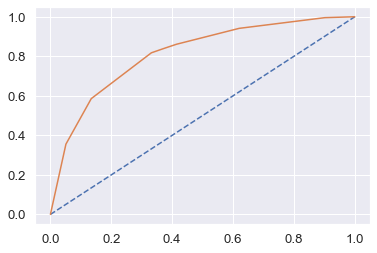

In [372]:
# predict probabilities
probs_cart = best_grid_dtcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs_cart)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

## CART -AUC and ROC for the test data

AUC: 0.800


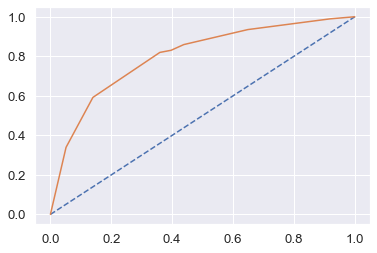

In [373]:
# predict probabilities
probs_cart = best_grid_dtcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs_cart)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

## CART Confusion Matrix and Classification Report for the training data

In [374]:
confusion_matrix(train_labels, ytrain_predict_dtcl)

array([[1258,  195],
       [ 268,  379]], dtype=int64)

In [375]:
#Train Data Accuracy
cart_train_acc=best_grid_dtcl.score(X_train,train_labels) 
cart_train_acc

0.7795238095238095

In [376]:
print(classification_report(train_labels, ytrain_predict_dtcl))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1453
           1       0.66      0.59      0.62       647

    accuracy                           0.78      2100
   macro avg       0.74      0.73      0.73      2100
weighted avg       0.77      0.78      0.78      2100



In [378]:
cart_metrics=classification_report(train_labels, ytrain_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.66
cart_train_recall  0.59
cart_train_f1  0.62


## CART Confusion Matrix and Classification Report for the testing data

In [379]:
confusion_matrix(test_labels, ytest_predict_dtcl)

array([[536,  87],
       [113, 164]], dtype=int64)

In [380]:
#Test Data Accuracy
cart_test_acc=best_grid_dtcl.score(X_test,test_labels)
cart_test_acc

0.7777777777777778

In [381]:
print(classification_report(test_labels, ytest_predict_dtcl))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       623
           1       0.65      0.59      0.62       277

    accuracy                           0.78       900
   macro avg       0.74      0.73      0.73       900
weighted avg       0.77      0.78      0.77       900



In [384]:
cart_metrics=classification_report(test_labels, ytest_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.65
cart_test_recall  0.59
cart_test_f1  0.62


## Cart Conclusion

### Train Data:
    
- AUC: 81%
- Accuracy: 78%
- Precision: 66%
- f1-Score: 62%

### Test Data:

- AUC: 80%
- Accuracy: 77%
- Precision: 65%
- f1-Score: 62%

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

Change is the most important variable for predicting diabetes

## RF Model Performance Evaluation on Training data

In [423]:
param_grid = {
    'max_depth': [10],## 20,30,40
    'max_features': [6],## 7,8,9
    'min_samples_leaf': [10],## 50,100
    'min_samples_split': [50], ## 60,70
    'n_estimators': [300] ## 100,200
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [424]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10], 'max_features': [6],
                         'min_samples_leaf': [10], 'min_samples_split': [50],
                         'n_estimators': [300]})

In [396]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 300}

In [416]:
best_grid = grid_search.best_estimator_

In [417]:
best_grid

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=10,
                       min_samples_split=50, n_estimators=300, random_state=1)

### Predicting the Training and Testing data

In [418]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

### RF Model Performance Evaluation on Training data

In [419]:
confusion_matrix(train_labels,ytrain_predict)

array([[1311,  142],
       [ 243,  404]], dtype=int64)

In [402]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.8166666666666667

In [420]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1453
           1       0.74      0.62      0.68       647

    accuracy                           0.82      2100
   macro avg       0.79      0.76      0.77      2100
weighted avg       0.81      0.82      0.81      2100



In [421]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.74
rf_train_recall  0.62
rf_train_f1  0.68


Area under Curve is 0.8772448624654423


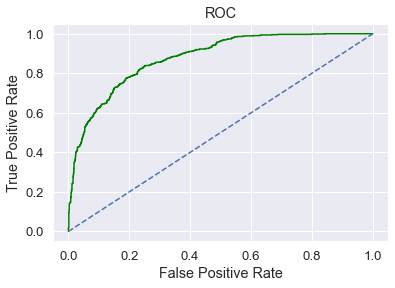

In [422]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

## RF Model Performance Evaluation on Test data

In [406]:
confusion_matrix(test_labels,ytest_predict)

array([[547,  76],
       [122, 155]], dtype=int64)

In [408]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.78

In [409]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       623
           1       0.67      0.56      0.61       277

    accuracy                           0.78       900
   macro avg       0.74      0.72      0.73       900
weighted avg       0.77      0.78      0.77       900



In [425]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.67
rf_test_recall  0.56
rf_test_f1  0.61


Area under Curve is 0.8168579888857339


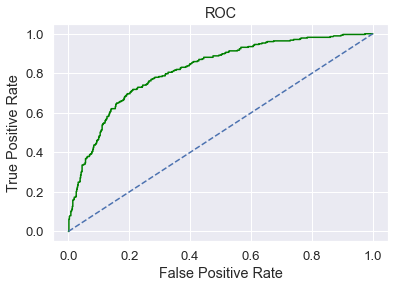

In [427]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [412]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.360730
Product Name  0.181456
Sales         0.180713
Commision     0.099884
Duration      0.094132
Age           0.059550
Type          0.014337
Destination   0.007641
Channel       0.001556


## Random Forest Conclusion

### Train Data:

- AUC: 88%
- Accuracy: 82%
- Precision: 74%
- f1-Score: 68%

### Test Data:

- AUC: 82%
- Accuracy: 78%
- Precision: 67%
- f1-Score: 61

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

Change is again the most important variable for predicting diabetes

### Building a Neural Network Classifier

In [431]:
aram_grid = {
    'hidden_layer_sizes': [100], # 50, 200
    'max_iter': [2500], #5000,2500
    'solver': ['adam'], #sgd
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

### Predicting the Training and Testing data

In [435]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## Neural Network Model Performance Evaluation on Training data

In [436]:
confusion_matrix(train_labels,ytrain_predict)

array([[1311,  142],
       [ 243,  404]], dtype=int64)

In [437]:
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.8166666666666667

In [438]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1453
           1       0.74      0.62      0.68       647

    accuracy                           0.82      2100
   macro avg       0.79      0.76      0.77      2100
weighted avg       0.81      0.82      0.81      2100



In [439]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.74
nn_train_recall  0.62
nn_train_f1  0.68


Area under Curve is 0.8772448624654423


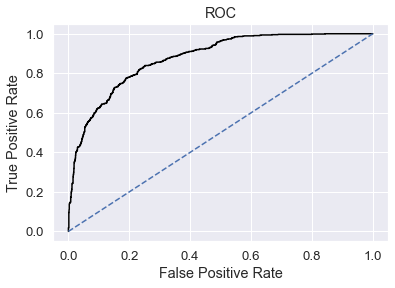

In [440]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

## Neural Network Model Performance Evaluation on Test data

In [441]:
confusion_matrix(test_labels,ytest_predict)

array([[547,  76],
       [122, 155]], dtype=int64)

In [442]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.78

In [443]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       623
           1       0.67      0.56      0.61       277

    accuracy                           0.78       900
   macro avg       0.74      0.72      0.73       900
weighted avg       0.77      0.78      0.77       900



In [444]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.67
nn_test_recall  0.56
nn_test_f1  0.61


Area under Curve is 0.8168579888857339


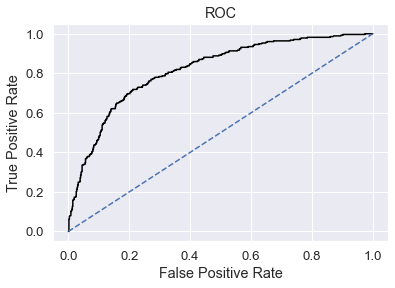

In [445]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

## Neural Network Conclusion

### Train Data:

- AUC: 88%
- Accuracy: 82%
- Precision: 74%
- f1-Score: 68

### Test Data:

- AUC: 82%
- Accuracy: 78%
- Precision: 67%
- f1-Score: 61%


Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

# 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

### Comparison of the performance metrics from the 3 models

In [446]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.78,0.78,0.82,0.78,0.82,0.78
AUC,0.81,0.80,0.88,0.82,0.88,0.82
Recall,0.59,0.59,0.62,0.56,0.62,0.56
Precision,0.66,0.65,0.74,0.67,0.74,0.67
F1 Score,0.62,0.62,0.68,0.61,0.68,0.61


### ROC Curve for the 3 models on the Training data

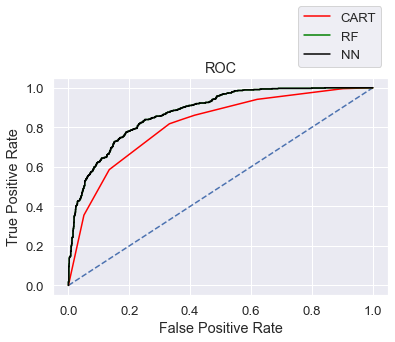

In [447]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### ROC Curve for the 3 models on the Test data

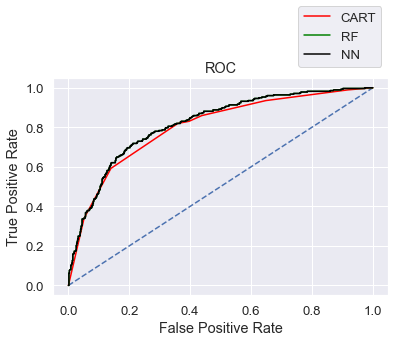

In [448]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### CONCLUSION :

### I am selecting the RF model, as it has better accuracy, precsion, recall, f1 score better than other two CART & NN.

# 2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations

I strongly recommended we collect more real time unstructured data and past data if possible.

- This is understood by looking at the insurance data by drawing relations between different variables such as day of the incident, time, age group, and associating it with other external information such as location, behavior patterns, weather information, airline/vehicle types, etc.

- Streamlining online experiences benefitted customers, leading to an increase in conversions, which subsequently raised profits.

- As per the data 90% of insurance is done by online channel. • Other interesting fact, is almost all the offline business has a claimed associated.

- Need to train the JZI agency resources to pick up sales as they are in bottom, need to run promotional marketing campaign or evaluate if we need to tie up with alternate agency.

- Also based on the model we are getting 80% accuracy, so we need customer books airline tickets or plans, cross sell the insurance based on the claim data pattern. Other interesting fact is more sales happen via Agency than Airlines and the trend shows the claim are processed more at Airline.

- Key performance indicators (KPI) The KPI’s of insurance claims are:
     • Reduce claims cycle time 
     • Increase customer satisfaction 
     • Combat fraud • Optimize claims recovery 
     • Reduce claim handling costs Insights gained from data and AI-powered analytics could expand the boundaries of     insurability, extend existing products, and give rise to new risk transfer solutions in areas like a non-damage business interruption and reputational damage.